<a href="https://colab.research.google.com/github/Sannevastaveren/Donders_internship/blob/main/Notebooks/Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#(this will take a few minutes to install all the dependences!)
!pip install deeplabcut

# Use TensorFlow 1.x:
%tensorflow_version 1.x

     |████████████████████████████████| 542 kB 5.5 MB/s 
     |████████████████████████████████| 29.2 MB 58.3 MB/s 
     |████████████████████████████████| 352 kB 33.4 MB/s 
     |████████████████████████████████| 47.6 MB 94 kB/s 
     |████████████████████████████████| 948 kB 37.3 MB/s 
     |████████████████████████████████| 109 kB 46.3 MB/s 
     |████████████████████████████████| 177 kB 49.1 MB/s 
     |████████████████████████████████| 296 kB 47.6 MB/s 
     |████████████████████████████████| 9.8 MB 31.0 MB/s 
     |████████████████████████████████| 546 kB 50.8 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=57656571795de5512ebe149b1299992e1d28cfc0e21576537f3cfbb0290fa08e
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1ccd8c4de573d4cbe13315d7e8b0a55fbc2
Successfully built filterpy
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
   

In [ ]:
# returns list with file names (0 = frameNumbers, 1 = timestamps, 2 = ledstatus, 3 = video)
def make_pg_files(date_serial):
      """ Makes a dictionary with the files of this date serial,
          dictionary looks like the following:
          {0 = frameNumbers, 1 = timestamps, 2 = ledstatus, 3 = video}

        Keyword arguments:
        date_serial -- string with date serial given in a set of pointgrey files
                      example: file name = PointGreyTimestamps2020-04-27T10_40_02.csv
                                the date serial would be "2020-04-27T10_40_02"

      """
      camera = 'PointGrey'
      types_files = ['Framenumber','Timestamps', 'LEDStatus']
      f_type = '.csv'
      v_type = '.avi'
      files = []
      for t in types_files:
        n = camera+t+date_serial+f_type
        files.append(n)
      files.append(camera+'Video'+date_serial+'downsampled'+v_type)
      return files

##Compression

In [ ]:
import os

def find_downsampled():
  all = []
  for root, dirs, files in os.walk("/content/drive/My Drive/Stage/"):
      for file in files:
          if file.endswith(".avi"):
            if 'downsampled' in file:
              all.append(os.path.join(root, file))
  return all
            
def find_finished_total():  
  total = 0
  finished = 0
  for root, dirs, files in os.walk("/content/drive/My Drive/Stage/"):
      for file in files:
          if file.endswith(".avi"):
            if 'downsampled' not in file:
              total += 1
              file_z = file.replace('.', 'downsampled.')
              if os.path.join(root, file_z) in all:
                finished += 1
  return finished, total

def downsample_stuff(all, finished, total):
  for root, dirs, files in os.walk("/content/drive/My Drive/Stage/"):
      for file in files:
          if file.endswith(".avi"):
            old_file = os.path.join(root, file)
            already_in = False      
            if 'downsampled' not in file:
              file_z = file.replace('.', 'downsampled.')
              if os.path.join(root, file_z) in all:
                  already_in = True
                  #print(os.path.join(root, file))
              if already_in is False:
                  old_file = os.path.join(root, file)
                  file_l = file.split('.')
                  file_l[1] = 'downsampled'
                  file_l.append('.avi')
                  file = ''.join(file_l)
                  new_file =  os.path.join(root, file)
                  !ffmpeg -i "$old_file" -filter:v scale=-1:256 -c:a copy "$new_file"
                  finished += 1
                  print(total, '/', finished)
                  os.remove(old_file)
              if already_in is True:
                  os.remove(old_file)

all = find_downsampled()
finished, total = find_finished_total()
downsample_stuff(all, finished,total)
print(total, '/', finished)
print(total, '/', len(all))
# everything downsampled is "done" so -- all = done
# everything not downsampled is to do -- so create list with that
# everything everything is all avi videos -- so create list with that

# total = all non downsampled videos
# all = all downsampled videos
# finished = all already downsampled videos

0 / 0
0 / 176


## Extraction

In [ ]:
#@title <font size="5">← ឵឵<i>Upgrade FFmpeg to v4.2.2</font> { vertical-output: true }
from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/yunooooo/gcct/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')
os.system('pip install git+git://github.com/AWConant/jikanpy.git')
os.system('add-apt-repository -y ppa:jonathonf/ffmpeg-4')
os.system('apt-get update')
os.system('apt install mediainfo')
os.system('apt-get install ffmpeg')
clear_output()
print('Installation finished.')

Installation finished.


In [ ]:
import os, re
def cut(video_file_path, start_time, end_time,trial):
  """ cuts the video using ffmpeg using the start and end time and the video
  Keyword arguments:
  video_file_path -- full path to the video
  start_time -- string of time in HH:MM:SS:ff format
  end_time -- string of time in HH:MM:SS:ff format
  """
  output_file_path = re.search("^[\/].+\/", video_file_path)
  output_file_path_raw = output_file_path.group(0)
  delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
  filename = re.sub("^[\/]", "", delsplit.group(0))
  filename_raw = re.sub(".{4}$", "", filename)
  file_extension = re.search(".{3}$", filename)
  file_extension_raw = file_extension.group(0)

  os.environ['inputFile'] = video_file_path
  os.environ['outputPath'] = output_file_path_raw
  os.environ['startTime'] = start_time
  os.environ['endTime'] = end_time
  os.environ['fileName'] = filename_raw
  os.environ['fileExtension'] = file_extension_raw
  os.environ['trial'] = trial
  !ffmpeg -hide_banner -i "$inputFile" -ss "$startTime" -to "$endTime" -c copy "$outputPath"/"$fileName""$trial"-TRIM."$fileExtension"

## Synchronization

### 1 Rat videos

In [ ]:
import pandas as pd
import time
import os
from datetime import datetime
from os.path import exists


def timestamp_extraction(file_path, date_serial, ADC='1', ADC_loc=''):
  """ Extraction of video based on timestamps of continuous and pointgrey files,
  Keyword arguments:
  file_path -- full path to the directory where the files are located
  date_serial -- string with date serial given in a set of pointgrey files
                 example: file name = PointGreyTimestamps2020-04-27T10_40_02.csv
                          the date serial would be "2020-04-27T10_40_02"
  ADC -- string of the channel number you want to use (default = '1')
  ADC_loc -- location of ADC files if different (default= '')
  """
  # make graphs inline otherwise notebook will crash
  %matplotlib inline

  # make file variables
  ADC_file = ADC_loc+'/100_ADC'+ADC+'_0.continuous'
  Pointgrey_files = make_pg_files(date_serial)
  FRAME_file = Pointgrey_files[0]
  TIME_file = Pointgrey_files[1]
  LED_file = Pointgrey_files[2]
  VIDEO_file = Pointgrey_files[3]
  
  # load in data as dataframes
  data = load(file_path+ADC_file)
  DF_ADC_samples, DF_ADC_timestamps = load_data_into_dataframe(data)
  DF_p_frames = pd.read_csv(file_path+FRAME_file, header=None)
  DF_p_timestamps = pd.read_csv(file_path+TIME_file, header=None)
  DF_p_led = pd.read_csv(file_path+LED_file, header=None)
  DF_p_timestamps = convert_and_uncycle_timestamps(DF_p_timestamps)
  DF_p_timestamps = DF_p_timestamps.apply(lambda x : x - DF_p_timestamps[0][0])
  #DF_ADC_samples.iloc[0:300000].plot.line()
  #process LED 30khertz to 30hertz
  DF_ADC_LED = downsample_ADC_led(DF_ADC_samples)
  #process LED pointgrey intensity to binary
  DF_p_led.rename(columns={0: 'value'}, inplace=True)
  DF_p_led['state'] = 0
  DF_p_led.loc[DF_p_led['value'] <= 500, 'state'] = 0
  DF_p_led.loc[DF_p_led['value'] > 500, 'state'] = 1

  # find the starting timestamp and stopping timestamp in the continuous files
  s = DF_ADC_timestamps[0][0]
  st = DF_ADC_timestamps.iloc[-1][0]
  print(s,'-',st)
  # multiply this number by 1000 to make it comparable to 
  # the continuous timestamps
  # (continuous file timestamps are sample numbers)
  DF_p_timestamps['index1'] = DF_p_timestamps.index*1000

  # find the closest value in the pointgrey file 
  # to the start and stop timestamp
  # (this is needed as the continuous files has a higher sampling rate and thus
  #  gives a more precise number than the index)
  c_s = DF_p_timestamps.iloc[(DF_p_timestamps['index1']-s).abs().argsort()[:1]].index.tolist()
  c_st = DF_p_timestamps.iloc[(DF_p_timestamps['index1']-st).abs().argsort()[:1]].index.tolist()
  
  # make a subset of the trial data
  sep_t = DF_p_timestamps.iloc[c_s[0]:c_st[0]]
  sep_l = DF_p_led['state'].iloc[c_s[0]:c_st[0]]
  # calculate the lag using the camera and lfp led signals
  phase = 0
  #calc_phase(sep_l.to_numpy(),DF_ADC_LED[0].to_numpy())
  # convert the pointgrey timestamps in seconds to HH:MM:SS:ff format
  start = pd.to_datetime(DF_p_timestamps[0].iloc[c_s[0]+phase], unit='s').strftime('%H:%M:%S.%f')
  stop = pd.to_datetime(DF_p_timestamps[0].iloc[c_st[0]+phase], unit='s').strftime('%H:%M:%S.%f')

  # print results and a comparison to the old method I used
  print('ADC time: ',pd.to_datetime(s/30000, unit='s').strftime('%H:%M:%S.%f'),'-',pd.to_datetime(st/30000, unit='s').strftime('%H:%M:%S.%f'))
  print('poingrey with ADC time: ', start, '-', stop)
  #------------------------------------------------------------------------------------------------------------
  start_d = datetime.strptime(start, '%H:%M:%S.%f')
  stop_d = datetime.strptime(stop, '%H:%M:%S.%f')
  start_da = datetime.strptime(pd.to_datetime(s/30000, unit='s').strftime('%H:%M:%S.%f'), '%H:%M:%S.%f')
  stop_da = datetime.strptime(pd.to_datetime(st/30000, unit='s').strftime('%H:%M:%S.%f'), '%H:%M:%S.%f')
  print('difference between ADC time and pg with ADC time: ', start_d-start_da, '-', stop_d-stop_da)
  print('difference between ADC time and pg with ADC time: ', start_da-start_d, '-', stop_da-stop_d)
  print('difference of the difference: ', (stop_d-stop_da)-(start_d-start_da))
  print('difference of the difference: ', (start_d-start_da)-(stop_d-stop_da))
  print('')
  
  #------------------------------------------------------------------------------------------------------------
  # make a subset of the trial data in the frames file
  sep_f = DF_p_frames.iloc[c_s[0]+phase:c_st[0]+phase]
  sep_l = DF_p_led.iloc[c_s[0]+phase:c_st[0]+phase]
  
  #sep_f.diff().plot.line()
  # plot the trial data to check for disturbances
  #sep_t.diff().plot.line(subplots=True)
  #sep_f.diff().plot.line(subplots=True)
  #DF_p_led['state'].iloc[c_s[0]:c_st[0]].plot.line()
  #DF_p_led['state'].iloc[c_s[0]+phase:c_st[0]+phase].plot.line()
  sep_l.reset_index(inplace=True)
  #sep_l['state'].plot.line()
  #DF_p_led['state'].iloc[c_s[0]:c_st[0]].plot.line()
  #sep_f.diff().plot.line()
  #DF_ADC_LED.plot.line()
  whole= DF_p_led['state'].to_numpy()
  trial =  DF_ADC_LED[0].to_numpy()
  #calculate cross correlation
  # cut the video using the start and stop time 
  print(ADC_loc)
  cut_video = file_path+VIDEO_file.replace('.avi',ADC_loc+'-TRIM.avi')
  file_exists = exists(cut_video)
  if not file_exists:
    cut(video_file_path=file_path+VIDEO_file, start_time= start, end_time=stop, trial=ADC_loc)
  return sep_t, whole, trial




### 2 Rat videos

In [ ]:
import deeplabcut
import pandas as pd
import math
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt

def extraction_t(file_path, date_serial, ADC='1', ADC_loc=''):
  """ Extraction of video based on timestamps of continuous and pointgrey files,
  Keyword arguments:
  file_path -- full path to the directory where the files are located
  date_serial -- string with date serial given in a set of pointgrey files
                 example: file name = PointGreyTimestamps2020-04-27T10_40_02.csv
                          the date serial would be "2020-04-27T10_40_02"
  ADC -- string of the channel number you want to use (default = '1')
  ADC_loc -- location of ADC files if different (default= '')
  """
  # make graphs inline otherwise notebook will crash
  %matplotlib inline

  # make file variables
  ADC_file = ADC_loc+'/100_ADC'+'1'+'_0.continuous'
  Pointgrey_files = make_pg_files(date_serial)
  FRAME_file = Pointgrey_files[0]
  TIME_file = Pointgrey_files[1]
  LED_file = Pointgrey_files[2]
  VIDEO_file = Pointgrey_files[3]
  
  # load in data as dataframes
  data = load(file_path+ADC_file)
  DF_ADC_Led, DF_ADC_timestamps = load_data_into_dataframe(data)
  DF_p_frames = pd.read_csv(file_path+FRAME_file, header=None)
  DF_p_timestamps = pd.read_csv(file_path+TIME_file, header=None)
  DF_p_led = pd.read_csv(file_path+LED_file, header=None)

  DF_p_timestamps = convert_and_uncycle_timestamps(DF_p_timestamps)
  DF_p_timestamps = DF_p_timestamps.apply(lambda x : x - DF_p_timestamps[0][0])

  b = DF_p_timestamps.loc[DF_p_timestamps[0] > 2650]
  e = b.loc[b[0] > 3900]
  begin= b.iloc[1][0]
  end= e.iloc[1][0]
  b_index = b.index[1]
  start= pd.to_datetime(begin, unit='s').strftime('%H:%M:%S.%f')
  stop= pd.to_datetime(end, unit='s').strftime('%H:%M:%S.%f')

  #cut(video_file_path=file_path+VIDEO_file, start_time= start, end_time=stop)

  ProjectFolderName = 'Stage/downsampled_tracker-sanne-2021-09-16'
  VideoType = 'avi' 
  path_config_file = '/content/drive/My Drive/'+ProjectFolderName+'/config.yaml'
  t_video = file_path+VIDEO_file
  t_video = t_video.replace('.avi', '-TRIM.avi')
  #deeplabcut.analyze_videos(path_config_file, t_video, save_as_csv=True)

  DLCscorer='DLC_resnet50_downsampled_trackerSep16shuffle1_322500'
  a_file = t_video.replace('.avi', DLCscorer+'.h5')
  #loading output of DLC
  Dataframe = pd.read_hdf(a_file)
  print(Dataframe.head())
  bodyparts=Dataframe.columns.get_level_values(1)
  bodyparts2plot= ['Head']
  df = Dataframe[DLCscorer]['Head']['likelihood'].to_frame()
  #df.plot.line()
  trials = {}
  # Find all values that have a small difference between -0.25 and 0.25 as well as a likelihood above 0.99
  # then groupby to only find this pattern consecutivly and count it up
  x = df[(df['likelihood'].diff().between(-0.25,0.25))&(df['likelihood'].between(0.99,1.0))].groupby(((~df['likelihood'].diff().between(-0.25,0.25))& (~df['likelihood'].between(0.99,1.0))).cumsum())
  # for all the newly made groups with the previous criteria only keep the longest ones
  # as these should correlate with the trials
  for k, v in x:
    if len(v) > 1000:
      trials[k] = [v.index[1], v.index[-1]]

  # k = group number, v = list with start and stop
  # y = index value
  # b = cut index value
  num = 0
  trial_dic = {}
  for k, v in trials.items():
    num = num+1
    trial_dic[num] = []
    for y in v:
      trial_dic[num].append(y+b_index)

  # now onto the led signal
  DF_p_led.rename(columns={0: 'value'}, inplace=True)
  DF_p_led['state'] = 0
  DF_p_led.loc[DF_p_led['value'] <= 500, 'state'] = 0
  DF_p_led.loc[DF_p_led['value'] > 500, 'state'] = 1

  DF_ADC_Led = downsample_ADC_led(DF_ADC_Led)
  # k = 1,2,3,4,...
  # v = [start index, end index]
  for k in trial_dic.keys():
    whole = DF_p_led.state.iloc[trial_dic[k][0]: trial_dic[k][1]].to_numpy()
    trial = DF_ADC_Led[0].to_numpy()
    shift,e_distance = compare_and_plot_signals_with_alignment(whole, trial, bshift_method = 'all', pad_function = pad_zeros_right)
    print(len(whole)-len(trial))
    trial_dic[k][0] = trial_dic[k][0] + shift 
    trial_dic[k][1] = trial_dic[k][1] + shift + abs(len(whole)-len(trial))
    trial_dic[k].append(shift)
    trial_dic[k].append(e_distance)
    # v = [start index, end index, shift, elucedian distance]

  df = pd.DataFrame.from_dict(trial_dic, orient='index',
                       columns=['begin','end','shift', 'elucidean distance'])
  correct_trial_index = df['elucidean distance'].idxmin()
  begin_shift = DF_p_timestamps.iloc[trial_dic[correct_trial_index][0]].values
  end_shift = DF_p_timestamps.iloc[trial_dic[correct_trial_index][1]].values
  start= pd.to_datetime(begin_shift[0], unit='s').strftime('%H:%M:%S.%f')
  stop= pd.to_datetime(end_shift[0], unit='s').strftime('%H:%M:%S.%f')
  print(start)
  print(stop)
  cut(video_file_path=file_path+VIDEO_file, start_time= start, end_time=stop)
  

  return whole, trial


## Tracking & Analysis

### Tracking

In [ ]:
import deeplabcut
def main_deeplabcut(directory, config, videoType, save_csv, create_labeled, create_plots, analyze_skeleton):
  # analyse
  deeplabcut.analyze_videos(config, [directory], save_as_csv=save_csv)
  if create_plots:
    # plot trajectory
    deeplabcut.plot_trajectories(config, [directory])
  if create_labeled:
    deeplabcut.create_labeled_video(config, [directory], videotype=videoType, draw_skeleton = True)
  if analyze_skeleton:
    deeplabcut.analyzeskeleton(config, [directory], videotype=videoType, shuffle=1, trainingsetindex=0, save_as_csv=True, destfolder=None)


ProjectFolderName = 'Stage/downsampled_tracker-sanne-2021-09-16'
VideoType = 'avi' 
path_config_file = '/content/drive/My Drive/'+ProjectFolderName+'/config.yaml'

# example:
# main_deeplabcut('/content/drive/My Drive/Stage/Trials/Downsampled/',path_config_file,VideoType,True,True,True,True)


### Analysis

#### Speed

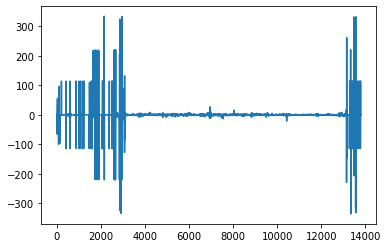

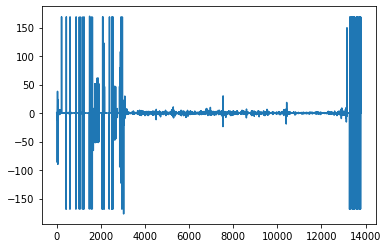

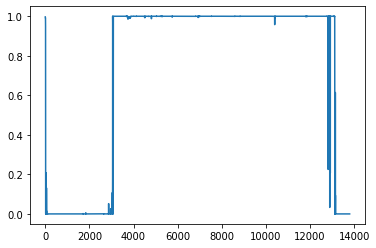

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


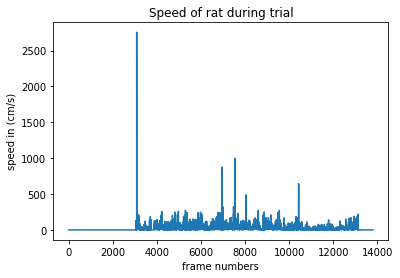

,xy1,xy2,likelihood,speed
0,226.12767028808594-170.2400665283203,226.14447021484375-170.38970947265625,0.995179,0.0
1,226.14447021484375-170.38970947265625,226.05419921875-170.474609375,0.993255,0.0
2,226.05419921875-170.474609375,225.96665954589844-170.44371032714844,0.992305,0.0
3,225.96665954589844-170.44371032714844,225.98379516601562-170.4655303955078,0.992179,0.0
4,225.98379516601562-170.4655303955078,225.9751739501953-170.45318603515625,0.991964,0.0
...,...,...,...,...
13794,113.66793823242188-172.43807983398438,113.6690444946289-172.4392547607422,0.000019,0.0
13795,113.6690444946289-172.4392547607422,113.66866302490234-172.43724060058594,0.000019,0.0
13796,113.66866302490234-172.43724060058594,113.67955780029297-172.44580078125,0.000019,0.0
13797,113.67955780029297-172.44580078125,113.72306823730469-172.4813995361328,0.000020,0.0


In [ ]:
import math
import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt

def calculateDistance(x1,y1,x2,y2):
  dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
  return dist

video='/content/drive/My Drive/Stage/Trials/trail_2_whitedownsampled.avi'
DLCscorer='DLC_resnet50_downsampled_trackerSep16shuffle1_322500'
def calculateSpeed(video, scorer, likelihood_filter):
  %matplotlib inline
  file = video.replace('.avi', scorer+'.h5')
  #loading output of DLC
  Dataframe = pd.read_hdf(file)
  #Getting data of the head
  head_x = Dataframe['DLC_resnet50_downsampled_trackerSep16shuffle1_322500']['Head']['x']
  head_y = Dataframe['DLC_resnet50_downsampled_trackerSep16shuffle1_322500']['Head']['y']
  head_l = Dataframe['DLC_resnet50_downsampled_trackerSep16shuffle1_322500']['Head']['likelihood']

  speed_list = []

  head_x[(head_x.diff() > 10) | (head_x.diff() < -10)] = np.nan
  head_x = head_x.fillna(method='ffill')
  head_y[(head_y.diff() > 10) | (head_y.diff() < -10)] = np.nan
  head_y = head_y.fillna(method='ffill')

  head_x.diff().plot.line()
  plt.show()
  head_y.diff().plot.line()
  plt.show()
  head_l.plot.line()
  plt.show()

  # calculate speed by calculating distance of rat between frames
  # then using the distance to calculate the speed 
  for i in range(len(Dataframe)-1):
    x1 = head_x[i]
    x2 = head_x[i+1]
    y1 = head_y[i]
    y2 = head_y[i+1]
    l1 = head_l[i]
    l2 = head_l[i+1]
    speed = calculateDistance(x1,y1,x2,y2)/0.033 #*0.2645833333)/10
    av_l = (l1+l2)/2
    # saving the data in the format 
    # xy1 = x coordinate frame 1 -- y coordinate frame 1
    # xy2 = x coordinate frame 2 -- y coordinate frame 2
    # likelihood = average of likelihood between these frames
    # speed = speed calculated with distance xy1 and xy2 and time of 0.033 sec
    speed_list.append(['{x1}-{y1}'.format(x1=x1,y1=y1),'{x1}-{y1}'.format(x1=x2,y1=y2), av_l, speed])

  df = pd.DataFrame(speed_list, columns=['xy1','xy2','likelihood','speed'])
  # filter to only keep above 0.99 likelihood
  df.speed[df.likelihood < 0.999] = 0
  df.to_csv('xy_likelihood_speed.csv')
  df.speed.to_csv('speed.txt', index=False)
  ax = df.speed.plot(title='Speed of rat during trial')
  ax.set(xlabel='frame numbers', ylabel='speed in (cm/s)')
  plt.show()
  return df

calculateSpeed(video, DLCscorer, 0.999)

#### Neurons

In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import gaussian_kde
import scipy.io as sio
from scipy.ndimage import gaussian_filter
import os
import sys
import re
#import deeplabcut

def Neuron_Analysis(ADC_loc, path, video, tracker,n_clusters):
    file = path+video
    file = file.replace('.avi', tracker+'.h5')
    # deeplabcut info
    ProjectFolderName = 'Stage/downsampled_tracker-sanne-2021-09-16'
    VideoType = 'avi'
    path_config_file = '/content/drive/My Drive/'+ProjectFolderName+'/config.yaml'
    t_video = path+video
    mat = 'R3SD3_{}'.format(ADC_loc)
    mat_fname = path+ADC_loc+'/R3SD3_{}.mat'.format(ADC_loc)
    Trial1_times, w, t = timestamp_extraction(file_path=path,
                                        date_serial='2019-10-14T09_35_30',
                                        ADC='1',
                                        ADC_loc=ADC_loc)    

    # example:
    main_deeplabcut(path+video,path_config_file,VideoType,True,True,True,True)

    # reading in data
    Dataframe = pd.read_hdf(file)
    bodyparts = Dataframe.columns.get_level_values(1)
    bodyparts2plot = ['Head']
    print(Dataframe.head())
    df_x = Dataframe['DLC_resnet50_downsampled_trackerSep16shuffle1_322500']['Head']['x'].to_frame()
    df_y = Dataframe['DLC_resnet50_downsampled_trackerSep16shuffle1_322500']['Head']['y'].to_frame()
    df_l = Dataframe['DLC_resnet50_downsampled_trackerSep16shuffle1_322500']['Head']['likelihood'].to_frame()
    print(df_l)
    df_xy = df_x.join(df_y)
    df_xy = df_xy.join(df_l)
    df_xy.to_csv('tracking_data.csv')
    print(df_xy.head())
    high_likelihood =  df_xy['likelihood']>0.999
    df_xy = df_xy[high_likelihood]
    print(df_xy.head())
    calculateSpeed(path+video, tracker, 0.999)
    # making a kmeans algorithm based on the full tracking data
    kmeans = KMeans(n_clusters=n_clusters).fit(df_xy[['x', 'y']])
    pred = kmeans.predict(df_xy[['x', 'y']])
    frame = pd.DataFrame(df_xy)
    # add what coordinate set belongs to what cluster
    frame['cluster'] = pred
    # find how many data points are in each cluster
    total_frame = frame['cluster'].value_counts()
    # calculate time by taking that 1 point is 1 frame and 1 frame  = 0.033s
    total_frame = total_frame.apply(lambda x: x * 0.033)
    # centroids in necessary or just wanna check
    centroids = kmeans.cluster_centers_

    # show a scatter plot of the clusters and trajectory with centroids
    plot = plt.scatter(frame['x'], frame['y'],
                c=frame['cluster'], 
                s=50, 
                alpha=0.5, 
                cmap='Set2')
    plot = gaussian_filter(plot, sigma=50)
    plt.title('Kmeans clusters on trajectory of {}'.format(ADC_loc))
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.show()


    # setting up the mat file

    mat_contents = sio.loadmat(mat_fname)
    # receive the subset of the trial timestamp data
    print(mat_fname)
    
    # make original index into column incase its needed
    Trial1_times['full_index'] = Trial1_times.index
    # reset the index so it starts from 0
    Trial1_times = Trial1_times.reset_index(drop=True)

    neur = 0
    neur_dic = {}
    #fig, axarr = plt.subplots(4, 5, sharex=True, sharey=True)
    for ar in mat_contents[mat][0]:
        neur = neur + 1
        neuron1 = ar
        if len(neuron1) > 1:
          neuron1_conv = [number / 30000 for number in neuron1]
          neuron1_conv_c = []

          # connect them into one array
          for l in neuron1_conv:
              neuron1_conv_c.extend(l)
          # getting the indexes of the spikes accorind to the trial video
          spike_indexes = []

          for n in neuron1_conv_c:
              x = Trial1_times.iloc[(
                  Trial1_times[0]-n).abs().argsort()[:1]].index.tolist()
              if x[0] != 0:
                  spike_indexes.append(x[0])
          # finding the corresponding x and y coordinates
          x_list = []
          y_list = []
          for n in spike_indexes:
              #x = df_xy['x'].iloc[n]
              x_list.append(df_xy['x'].iloc[n])
              y_list.append(df_xy['y'].iloc[n])
    
          # combine the lists
          data_tuples = list(zip(x_list, y_list))
          df_xy_neurons = pd.DataFrame(data_tuples, columns=['x', 'y'])
          if len(df_xy_neurons) > 0:
            # predict in which cluster each coordinate set belongs
            pred = kmeans.predict(df_xy_neurons)
            frame = pd.DataFrame(df_xy_neurons)
            # add the cluster data to each coordinate set
            frame['clusters'] = pred
            neuron_frame = frame['clusters'].value_counts()
            neuron_frame = pd.concat([neuron_frame, total_frame], axis=1)
            # calculate the spikes per second by:
            #     amount of spikes in cluster /time spent in cluster
            neuron_frame['Result'] = neuron_frame['clusters']/neuron_frame['cluster']
            # value is the value which will be assigned to each cluster based on the
            # last calculation
            frame['value'] = np.NaN
            # each cluster gets its spikes per second value which will decide the 
            # color in the graph
            for i in range(n_clusters):
                frame.loc[frame.clusters == i, 'value'] = neuron_frame.iloc[i]['Result']
            neur_dic[neur] = frame
        else:
          print(neuron1)

    return neur_dic
def plot_neurons(neur_dic):
    rows, cols = 20, 5
    fig, ax = plt.subplots(rows, cols,
                        sharex='col', 
                        sharey='row',
                        figsize=(20,60)
                        )

    n = 0
    for row in range(rows):
        n= n+1
        for col in range(cols):
            
            if n in neur_dic.keys():
              print(row+1, col)
              print(len(neur_dic[row+1]))
              if len(neur_dic[row+1])-1 >= col:
                neur_dic[row+1][col]
                plot = ax[row, col].scatter(neur_dic[row+1][col]['x'], neur_dic[row+1][col]['y'], c=neur_dic[row+1][col]['value'], s=40, cmap='coolwarm')

                cbar = fig.colorbar(plot, ax=ax[row, col])
                cbar.set_label('Spikes per second')
                ax[row, col].set_title("trial {}".format(col+1))

    for i in range(rows):
      ax[i,0].invert_yaxis()
   

    plt.show()
    #file = 'Data/PointGreyVideo2019-10-14T09_35_30downsampled-TRIMDLC_resnet50_downsampled_trackerSep16shuffle1_322500.h5'

def pipeline(video, path, tracker, n_clusters):
  video_result_dict = {}
  for i in range(1,6):
    trial_result = Neuron_Analysis(
                       path = path, 
                       video= video, 
                       tracker= tracker, 
                       n_clusters= n_clusters,
                       ADC_loc="trial{}".format(i))
    for k,v in trial_result.items():
      if k not in video_result_dict.keys():
        video_result_dict[k] = [v]
      else:
        video_result_dict[k].append(v)
  return video_result_dict


#r = pipeline(path = '/content/drive/My Drive/Stage/Neuron_test/', 
 #                      video='PointGreyVideo2019-10-14T09_35_30downsampled-TRIM.avi', 
  #                     tracker= 'DLC_resnet50_downsampled_trackerSep16shuffle1_322500', 
   #                    n_clusters=6)
'PointGreyVideo2019-10-14T09_35_30downsampled-TRIMDLC_resnet50_downsampled_trackerSep16shuffle1_322500'

'PointGreyVideo2019-10-14T09_35_30downsampled-TRIMDLC_resnet50_downsampled_trackerSep16shuffle1_322500'

5
4
3
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
1 0
5
1 1
5
1 2
5
1 3
5
1 4
5
2 0
4
2 1
4
2 2
4
2 3
4
2 4
4
3 0
3
3 1
3
3 2
3
3 3
3
3 4
3
4 0
5
4 1
5
4 2
5
4 3
5
4 4
5
5 0
5
5 1
5
5 2
5
5 3
5
5 4
5
6 0
5
6 1
5
6 2
5
6 3
5
6 4
5
7 0
5
7 1
5
7 2
5
7 3
5
7 4
5
8 0
5
8 1
5
8 2
5
8 3
5
8 4
5
9 0
5
9 1
5
9 2
5
9 3
5
9 4
5
10 0
5
10 1
5
10 2
5
10 3
5
10 4
5
11 0
5
11 1
5
11 2
5
11 3
5
11 4
5
12 0
5
12 1
5
12 2
5
12 3
5
12 4
5
13 0
5
13 1
5
13 2
5
13 3
5
13 4
5
14 0
5
14 1
5
14 2
5
14 3
5
14 4
5
15 0
5
15 1
5
15 2
5
15 3
5
15 4
5
16 0
5
16 1
5
16 2
5
16 3
5
16 4
5
17 0
5
17 1
5
17 2
5
17 3
5
17 4
5
18 0
5
18 1
5
18 2
5
18 3
5
18 4
5
19 0
5
19 1
5
19 2
5
19 3
5
19 4
5
20 0
5
20 1
5
20 2
5
20 3
5
20 4
5


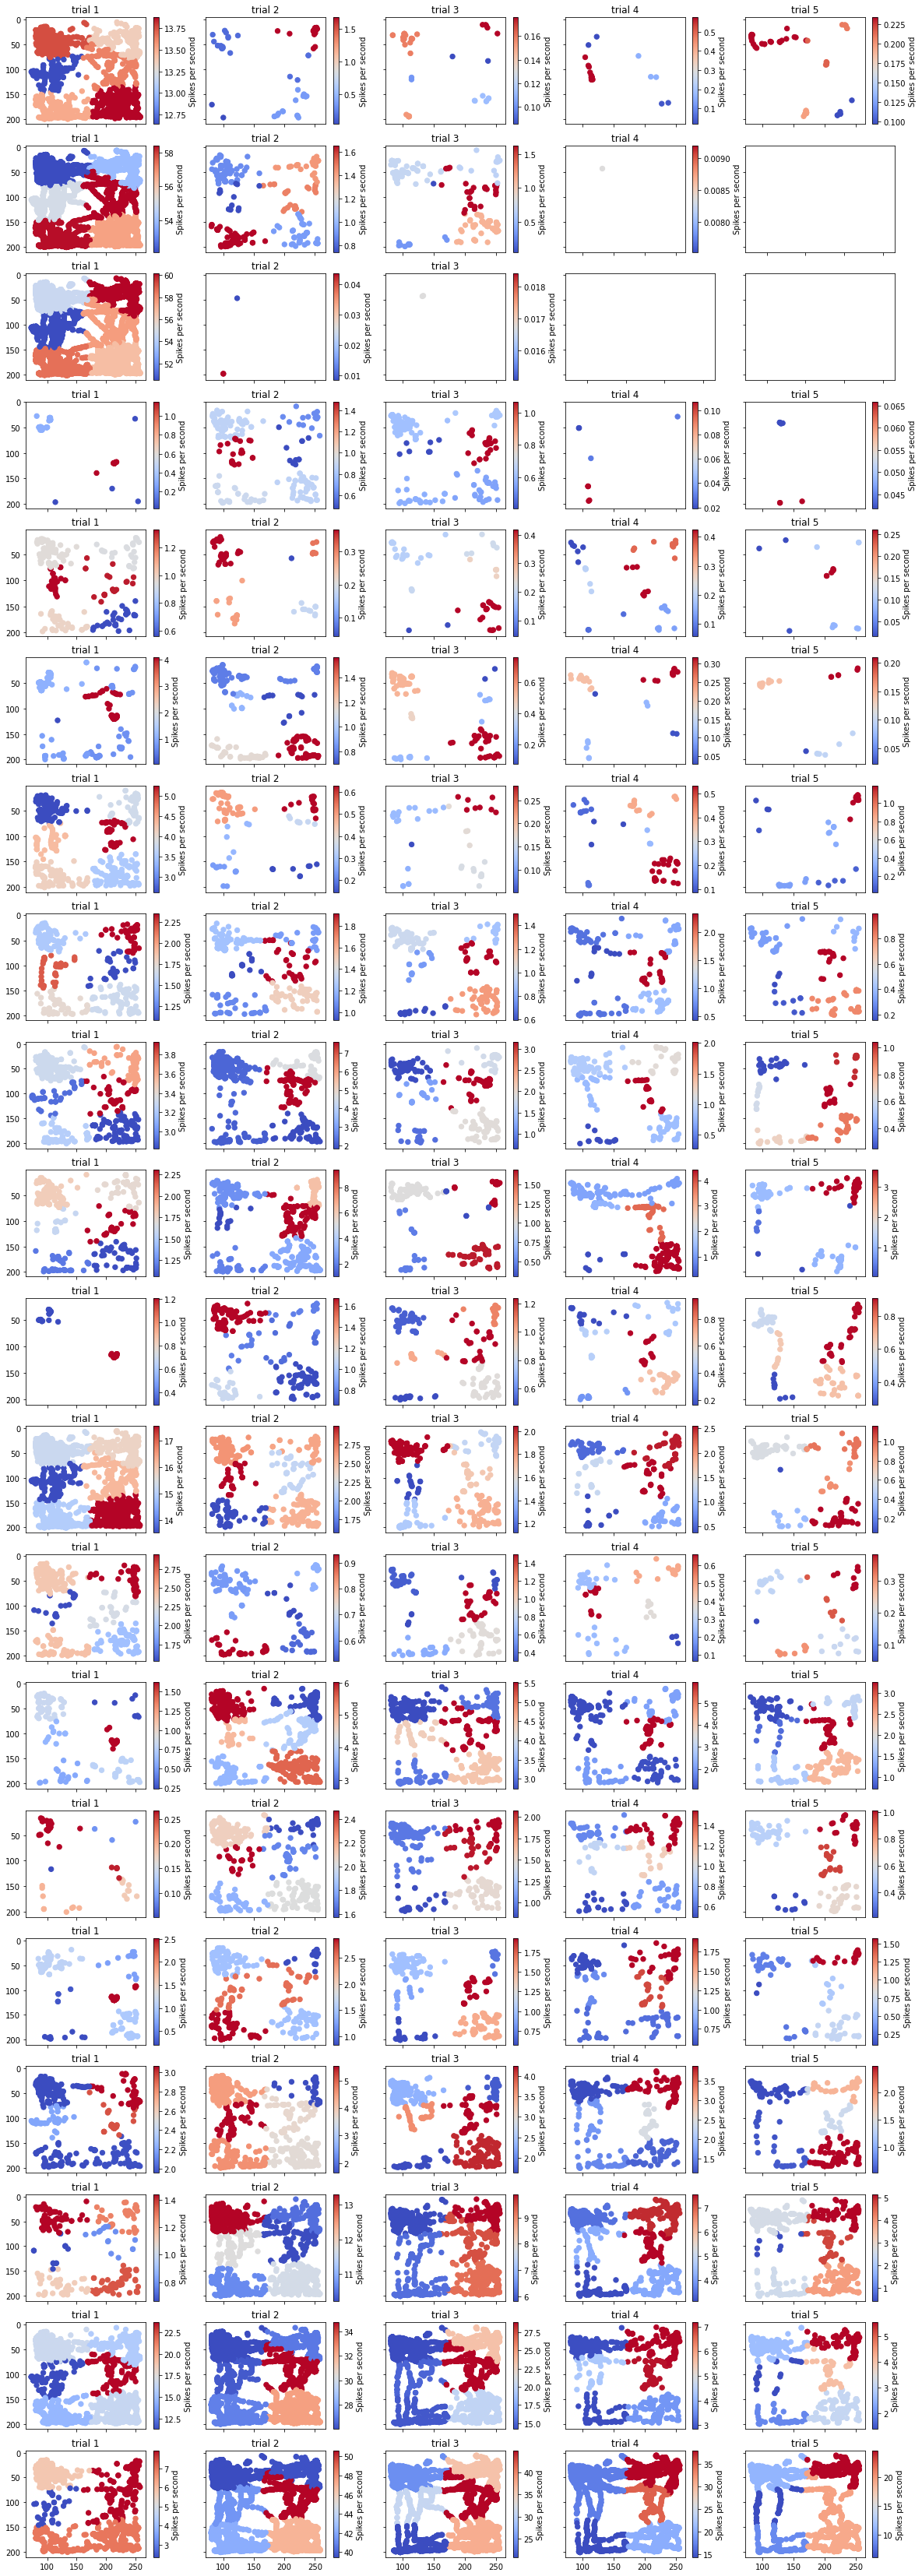

In [ ]:

for k,v in r.items():
  print(len(v))
plot = plot_neurons(r)

Loading continuous data...
81325800.0 - 91637480.0
ADC time:  00:45:10.860000 - 00:50:54.582666
poingrey with ADC time:  00:45:10.327750 - 00:50:53.929750
difference between ADC time and pg with ADC time:  -1 day, 23:59:59.467750 - -1 day, 23:59:59.347084
difference between ADC time and pg with ADC time:  0:00:00.532250 - 0:00:00.652916
difference of the difference:  -1 day, 23:59:59.879334
difference of the difference:  0:00:00.120666

trial1
Using snapshot-322500 for model /content/drive/My Drive/Stage/downsampled_tracker-sanne-2021-09-16/dlc-models/iteration-3/downsampled_trackerSep16-trainset95shuffle1
Starting to analyze %  /content/drive/My Drive/Stage/Neuron_test/PointGreyVideo2019-10-14T09_35_30downsampled-TRIM.avi
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extr

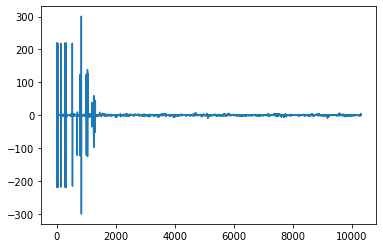

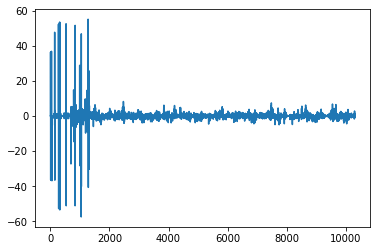

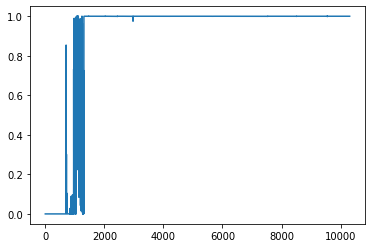

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


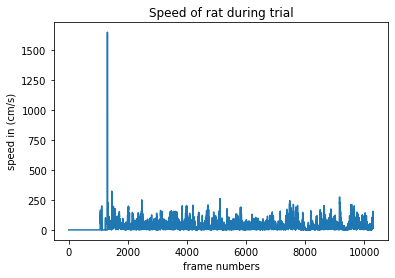

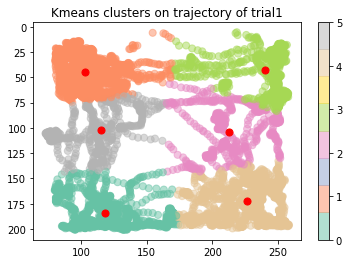

/content/drive/My Drive/Stage/Neuron_test/trial1/R3SD3_trial1.mat


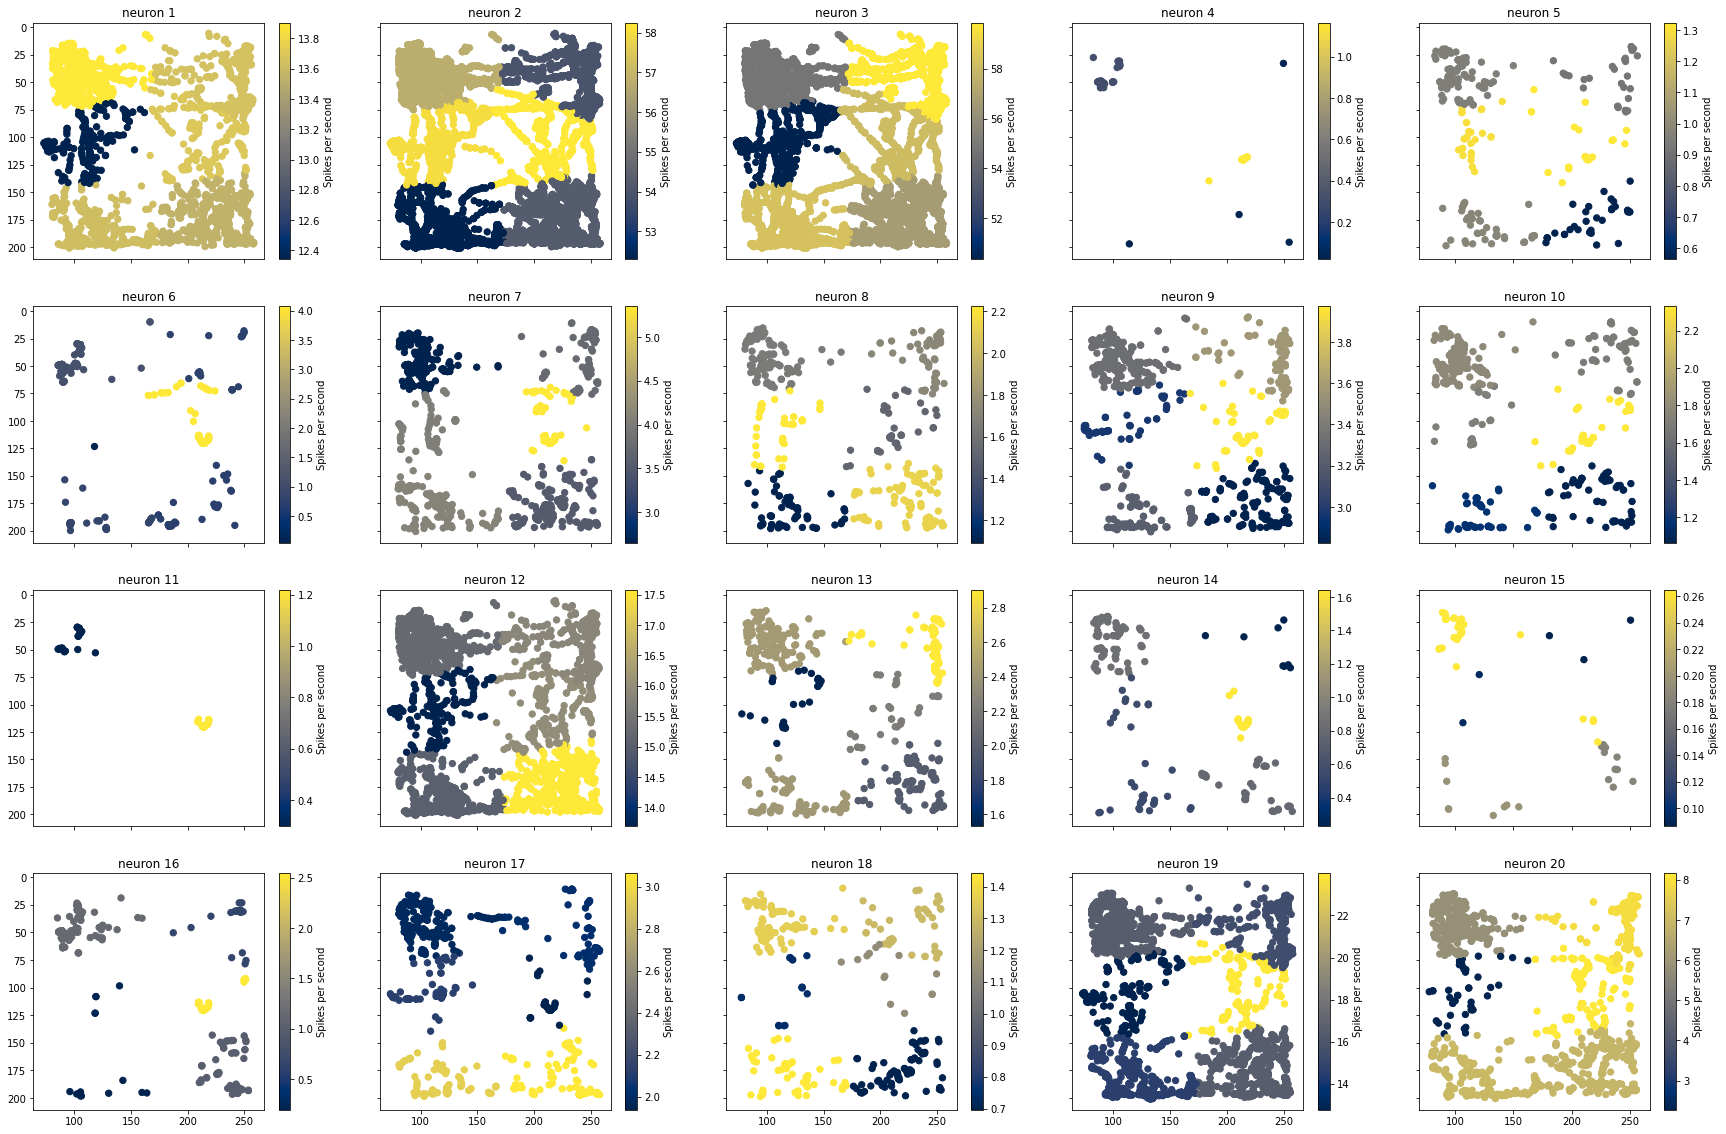

In [ ]:
neur = Neuron_Analysis(path = '/content/drive/My Drive/Stage/Neuron_test/', 
                       video='PointGreyVideo2019-10-14T09_35_30downsampled-TRIM.avi', 
                       tracker= 'DLC_resnet50_downsampled_trackerSep16shuffle1_322500', 
                       n_clusters=6,
                       ADC_loc="trial1")
plot = plot_neurons(neur)

Loading continuous data...
173012400.0 - 183694768.0
ADC time:  01:36:07.080000 - 01:42:03.158933
poingrey with ADC time:  01:36:05.756125 - 01:42:01.754500
difference between ADC time and pg with ADC time:  -1 day, 23:59:58.676125 - -1 day, 23:59:58.595567
difference between ADC time and pg with ADC time:  0:00:01.323875 - 0:00:01.404433
difference of the difference:  -1 day, 23:59:59.919442
difference of the difference:  0:00:00.080558

trial2
Using snapshot-322500 for model /content/drive/My Drive/Stage/downsampled_tracker-sanne-2021-09-16/dlc-models/iteration-3/downsampled_trackerSep16-trainset95shuffle1
Starting to analyze %  /content/drive/My Drive/Stage/Neuron_test/PointGreyVideo2019-10-14T09_35_30downsampledtrial2-TRIM.avi
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames'

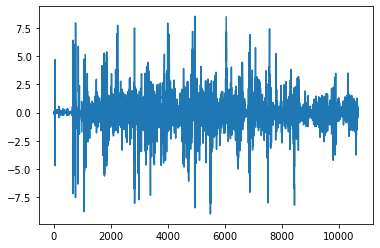

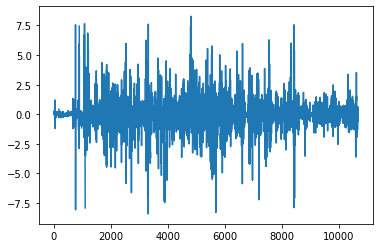

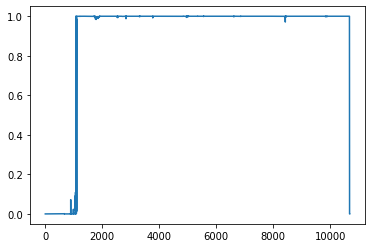

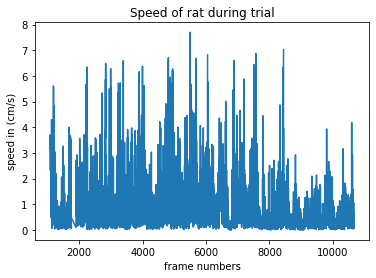

KeyboardInterrupt: ignored

In [ ]:
neur = Neuron_Analysis(path = '/content/drive/My Drive/Stage/Neuron_test/', 
                       video='PointGreyVideo2019-10-14T09_35_30downsampledtrial2-TRIM.avi', 
                       tracker= 'DLC_resnet50_downsampled_trackerSep16shuffle1_322500', 
                       n_clusters=6,
                       ADC_loc = 'trial2')
plot = plot_neurons(neur)

Loading continuous data...
265083300.0 - 275432868.0
ADC time:  02:27:16.110000 - 02:33:01.095600
poingrey with ADC time:  02:27:14.247125 - 02:32:59.148750
difference between ADC time and pg with ADC time:  -1 day, 23:59:58.137125 - -1 day, 23:59:58.053150
difference between ADC time and pg with ADC time:  0:00:01.862875 - 0:00:01.946850
difference of the difference:  -1 day, 23:59:59.916025
difference of the difference:  0:00:00.083975

trial3
Using snapshot-322500 for model /content/drive/My Drive/Stage/downsampled_tracker-sanne-2021-09-16/dlc-models/iteration-3/downsampled_trackerSep16-trainset95shuffle1
Starting to analyze %  /content/drive/My Drive/Stage/Neuron_test/PointGreyVideo2019-10-14T09_35_30downsampledtrial3-TRIM.avi
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames'

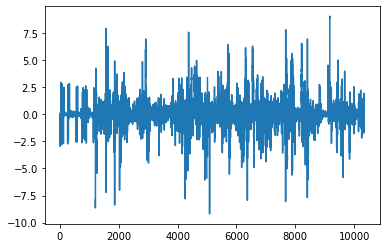

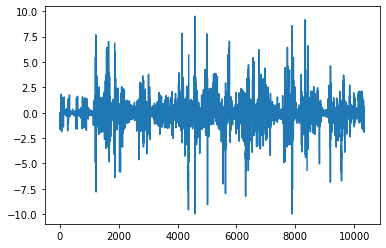

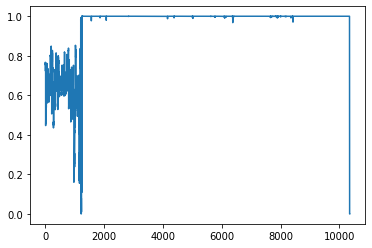

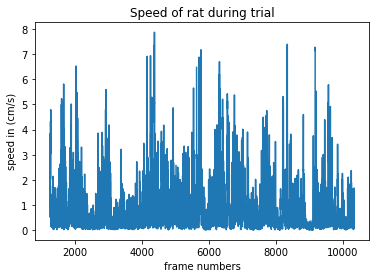

KeyboardInterrupt: ignored

In [ ]:
neur = Neuron_Analysis(path = '/content/drive/My Drive/Stage/Neuron_test/', 
                       video='PointGreyVideo2019-10-14T09_35_30downsampledtrial3-TRIM.avi', 
                       tracker= 'DLC_resnet50_downsampled_trackerSep16shuffle1_322500',  
                       n_clusters=6,
                       ADC_loc='trial3')
plot = plot_neurons(neur)

Loading continuous data...
356835300.0 - 366262244.0
ADC time:  03:18:14.510000 - 03:23:28.741466
poingrey with ADC time:  03:18:11.841250 - 03:23:25.984875
difference between ADC time and pg with ADC time:  -1 day, 23:59:57.331250 - -1 day, 23:59:57.243409
difference between ADC time and pg with ADC time:  0:00:02.668750 - 0:00:02.756591
difference of the difference:  -1 day, 23:59:59.912159
difference of the difference:  0:00:00.087841

trial4
Using snapshot-322500 for model /content/drive/My Drive/Stage/downsampled_tracker-sanne-2021-09-16/dlc-models/iteration-3/downsampled_trackerSep16-trainset95shuffle1
Starting to analyze %  /content/drive/My Drive/Stage/Neuron_test/PointGreyVideo2019-10-14T09_35_30downsampledtrial4-TRIM.avi
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames'

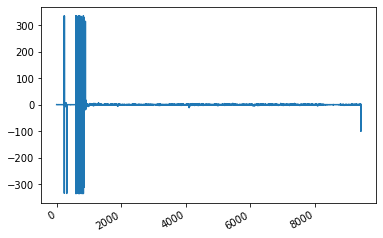

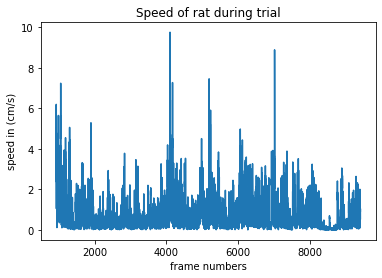

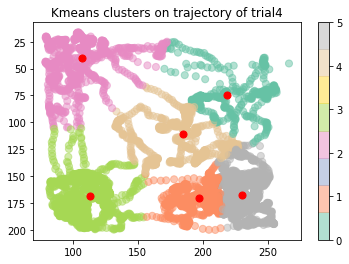

/content/drive/My Drive/Stage/Neuron_test/trial4/R3SD3_trial4.mat
[[356613601]]


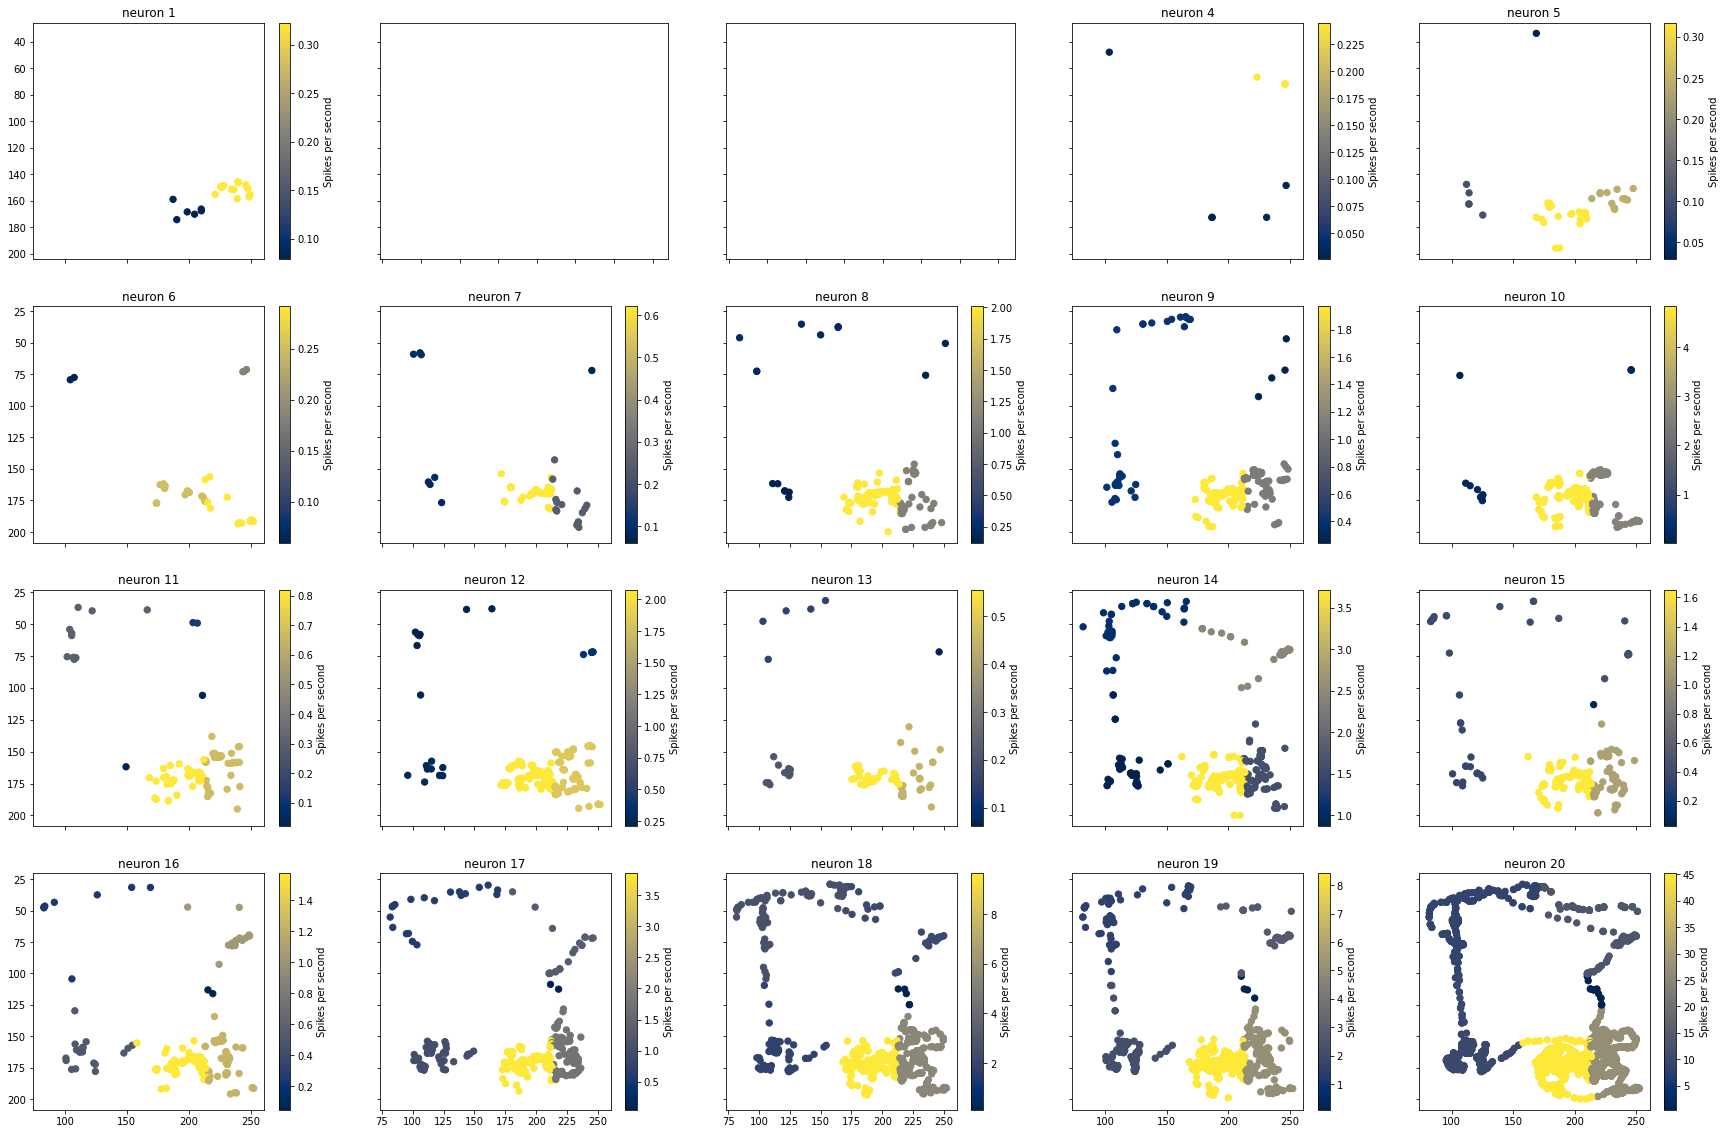

In [ ]:
neur = Neuron_Analysis(path = '/content/drive/My Drive/Stage/Neuron_test/', 
                       video='PointGreyVideo2019-10-14T09_35_30downsampledtrial4-TRIM.avi', 
                       tracker= 'DLC_resnet50_downsampled_trackerSep16shuffle1_322500', 
                       n_clusters=6,
                       ADC_loc='trial4')
plot = plot_neurons(neur)

Loading continuous data...
447645900.0 - 457734348.0
ADC time:  04:08:41.530000 - 04:14:17.811600
poingrey with ADC time:  04:08:38.111125 - 04:14:14.315250
difference between ADC time and pg with ADC time:  -1 day, 23:59:56.581125 - -1 day, 23:59:56.503650
difference between ADC time and pg with ADC time:  0:00:03.418875 - 0:00:03.496350
difference of the difference:  -1 day, 23:59:59.922525
difference of the difference:  0:00:00.077475

trial5
Using snapshot-322500 for model /content/drive/My Drive/Stage/downsampled_tracker-sanne-2021-09-16/dlc-models/iteration-3/downsampled_trackerSep16-trainset95shuffle1
Starting to analyze %  /content/drive/My Drive/Stage/Neuron_test/PointGreyVideo2019-10-14T09_35_30downsampledtrial5-TRIM.avi
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames'

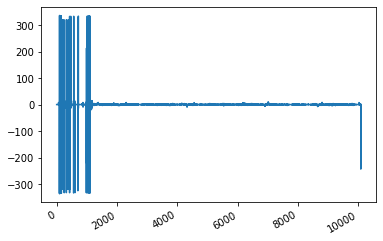

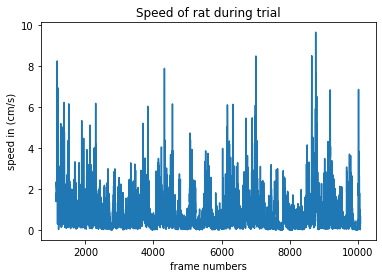

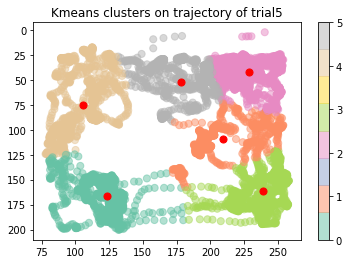

/content/drive/My Drive/Stage/Neuron_test/trial5/R3SD3_trial5.mat


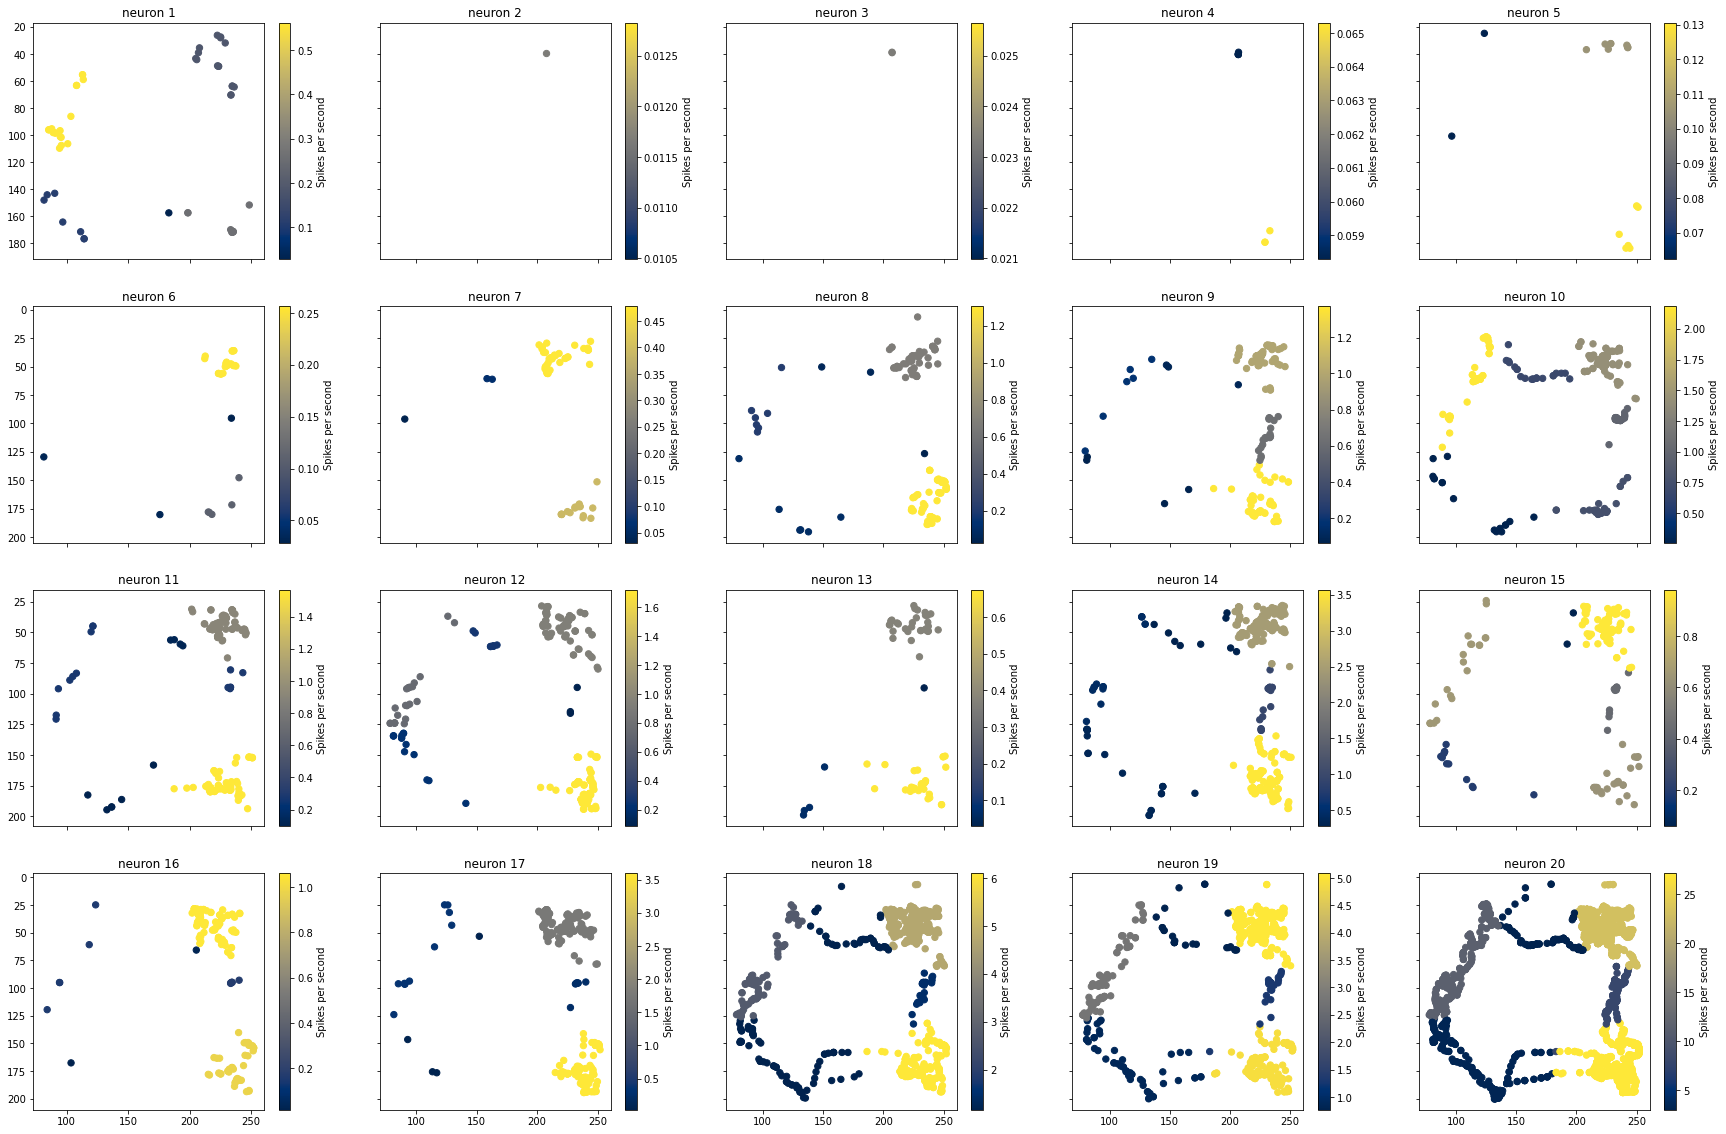

In [ ]:
neur = Neuron_Analysis(path = '/content/drive/My Drive/Stage/Neuron_test/', 
                       video='PointGreyVideo2019-10-14T09_35_30downsampledtrial5-TRIM.avi', 
                       tracker= 'DLC_resnet50_downsampled_trackerSep16shuffle1_322500', 
                       n_clusters=6,
                       ADC_loc='trial5')
plot = plot_neurons(neur)

## Extra functions

### Synchronization

In [ ]:
import matplotlib.pyplot as plt # matplot lib is the premiere plotting lib for Python: https://matplotlib.org/
import numpy as np # numpy is the premiere signal handling library for Python: http://www.numpy.org/
import scipy as sp # for signal processing
from scipy import signal
from scipy.spatial import distance
import IPython.display as ipd
import librosa
import random
import math


def pad_zeros_right(s, padding_length):
    # https://numpy.org/doc/1.18/reference/generated/numpy.pad.html
    return np.pad(s, (0, padding_length), mode = 'constant', constant_values=0)

def pad_mean_right(s, padding_length):
    # https://numpy.org/doc/1.18/reference/generated/numpy.pad.html
    return np.pad(s, (0, padding_length), mode = 'mean')

# def compare_and_plot_signals(a, b, distance_function = distance.euclidean, alignment_function = None):
def plot_signals_with_alignment(a, b, pad_function = None):
    if(len(a) != len(b) and pad_function is None):
        raise Exception(f"Signal 'a' and 'b' must be the same size; len(a)={len(a)} and len(b)={len(b)} or pad_function must not be None")
    elif(len(a) != len(b) and pad_function is not None):
        if(len(a) < len(b)):
            a = pad_function(a, len(b) - len(a))
        else:
            b = pad_function(b, len(a) - len(b))
    
    correlate_result = np.correlate(a, b, 'full')
    shift_positions = np.arange(-len(a) + 1, len(b))
    
    print("len(a)", len(a), "len(b)", len(b), "len(correlate_result)", len(correlate_result))

    fig, axes = plt.subplots(5, 1, figsize=(10, 18))
    
    axes[0].plot(a, alpha=0.7, label="a", marker="o")
    axes[0].plot(b, alpha=0.7, label="b", marker="D")
    axes[0].legend()
    axes[0].set_title("Raw Signals 'a' and 'b'")
    
    if len(shift_positions) < 20:
        # useful for debugging and showing correlation results
        print(shift_positions)
        print(correlate_result)

    best_correlation_index = np.argmax(correlate_result)
    shift_amount_debug = shift_positions[best_correlation_index]
    shift_amount = (-len(a) + 1) + best_correlation_index
    print("best_correlation_index", best_correlation_index, "shift_amount_debug", shift_amount_debug, "shift_amount", shift_amount)
    
    axes[1].stem(shift_positions, correlate_result, use_line_collection=True, label="Cross-correlation of a and b")
    axes[1].set_title(f"Cross-Correlation Result | Best Match Index: {best_correlation_index} Signal 'b' Shift Amount: {shift_amount}")
    axes[1].set_ylabel("Cross Correlation")
    axes[1].set_xlabel("'b' Signal Shift Amount")
    
    best_match_ymin = 0
    best_match_ymin_normalized = map(best_match_ymin, axes[1].get_ylim()[0], axes[1].get_ylim()[1], 0, 1)
    best_match_ymax = correlate_result[best_correlation_index]
    best_match_ymax_normalized = map(best_match_ymax, axes[1].get_ylim()[0], axes[1].get_ylim()[1], 0, 1)
    axes[1].axvline(shift_positions[best_correlation_index], ymin=best_match_ymin_normalized, ymax=best_match_ymax_normalized, 
                    linewidth=2, color='orange', alpha=0.8, linestyle='-.', 
                    label=f"Best match ({shift_amount}, {best_match_ymax:.2f})")
    axes[1].legend()
    
    b_shifted_mean_fill = shift_array(b, shift_amount, np.mean(b))
    axes[2].plot(a, alpha=0.7, label="a", marker="o")
    axes[2].plot(b_shifted_mean_fill, alpha=0.7, label="b_shifted_mean_fill", marker="D")
    axes[2].legend()
    axes[2].set_title("Signals 'a' and 'b_shifted_mean_fill'")
    
    b_shifted_zero_fill = shift_array(b, shift_amount, 0)
    axes[3].plot(a, alpha=0.7, label="a", marker="o")
    axes[3].plot(b_shifted_zero_fill, alpha=0.7, label="b_shifted_zero_fill", marker="D")
    axes[3].legend()
    axes[3].set_title("Signals 'a' and 'b_shifted_zero_fill'")
    
    b_shifted_roll = np.roll(b, shift_amount)
    axes[4].plot(a, alpha=0.7, label="a", marker="o")
    axes[4].plot(b_shifted_roll, alpha=0.7, label="b_shifted_roll", marker="D")
    axes[4].legend()
    axes[4].set_title("Signals 'a' and 'b_shifted_roll'")
    
    fig.tight_layout()
    
def compare_and_plot_signals_with_alignment(a, b, bshift_method = 'mean_fill', pad_function = None):
    '''Aligns signals using cross correlation and then plots
    
       bshift_method can be: 'mean_fill', 'zero_fill', 'roll', or 'all'. Defaults to 'mean_fill'
    '''
    
    if(len(a) != len(b) and pad_function is None):
        raise Exception(f"Signal 'a' and 'b' must be the same size; len(a)={len(a)} and len(b)={len(b)} or pad_function must not be None")
    elif(len(a) != len(b) and pad_function is not None):
        if(len(a) < len(b)):
            a = pad_function(a, len(b) - len(a))
        else:
            b = pad_function(b, len(a) - len(b))
    
    correlate_result = np.correlate(a, b, 'full')
    shift_positions = np.arange(-len(a) + 1, len(b))
    print("len(a)", len(a), "len(b)", len(b), "len(correlate_result)", len(correlate_result))
    
    euclid_distance_a_to_b = distance.euclidean(a, b)
    
    num_charts = 3
    chart_height = 3.6
    if bshift_method is 'all':
        num_charts = 5
    
    fig, axes = plt.subplots(num_charts, 1, figsize=(10, num_charts * chart_height))
    
    # Turn on markers only if < 50 points
    a_marker = None
    b_marker = None
    if len(a) < 50:
        a_marker = "o"
        b_marker = "D"
        
    axes[0].plot(a, alpha=0.7, label="a", marker=a_marker)
    axes[0].plot(b, alpha=0.7, label="b", marker=b_marker)
    axes[0].legend()
    axes[0].set_title(f"Raw Signals | Euclidean Distance From 'a' to 'b' = {euclid_distance_a_to_b:.2f}")
    
    if len(shift_positions) < 20:
        # useful for debugging and showing correlation results
        print(shift_positions)
        print(correlate_result)
    
    best_correlation_index = np.argmax(correlate_result)
    shift_amount_debug = shift_positions[best_correlation_index]
    shift_amount = (-len(a) + 1) + best_correlation_index
    print("best_correlation_index", best_correlation_index, "shift_amount_debug", shift_amount_debug, "shift_amount", shift_amount)
    
    #axes[1].plot(shift_positions, correlate_result)
    axes[1].stem(shift_positions, correlate_result, use_line_collection=True, label="Cross-correlation of a and b")
    axes[1].set_title(f"Cross-correlation result | Best match index: {best_correlation_index}; Signal 'b' shift amount: {shift_amount}")
    axes[1].set_ylabel("Cross Correlation")
    axes[1].set_xlabel("'b' Signal Shift Amount")
    
    best_match_ymin = 0
    best_match_ymin_normalized = map(best_match_ymin, axes[1].get_ylim()[0], axes[1].get_ylim()[1], 0, 1)
    best_match_ymax = correlate_result[best_correlation_index]
    best_match_ymax_normalized = map(best_match_ymax, axes[1].get_ylim()[0], axes[1].get_ylim()[1], 0, 1)
    axes[1].axvline(shift_positions[best_correlation_index], ymin=best_match_ymin_normalized, ymax=best_match_ymax_normalized, 
                    linewidth=2, color='orange', alpha=0.8, linestyle='-.', 
                    label=f"Best match ({shift_amount}, {best_match_ymax:.2f})")
    axes[1].legend()
    
    if bshift_method is 'mean_fill' or bshift_method is 'all':
        b_shifted_mean_fill = shift_array(b, shift_amount, np.mean(b))
        euclid_distance_a_to_b_shifted_mean_fill = distance.euclidean(a, b_shifted_mean_fill)
        axes[2].plot(a, alpha=0.7, label="a", marker=a_marker)
        axes[2].plot(b_shifted_mean_fill, alpha=0.7, label="b_shifted_mean_fill", marker=b_marker)
        axes[2].legend()
        axes[2].set_title(f"Euclidean distance From 'a' to 'b_shifted_mean_fill' = {euclid_distance_a_to_b_shifted_mean_fill:.2f}")
    
    ax_idx = 0
    if bshift_method is 'zero_fill' or bshift_method is 'all':
        if bshift_method is 'zero_fill':
            ax_idx = 2
        else:
            ax_idx = 3
    
        b_shifted_zero_fill = shift_array(b, shift_amount, 0)
        euclid_distance_a_to_b_shifted_zero_fill = distance.euclidean(a, b_shifted_zero_fill)
        axes[ax_idx].plot(a, alpha=0.7, label="a", marker=a_marker)
        axes[ax_idx].plot(b_shifted_zero_fill, alpha=0.7, label="b_shifted_zero_fill", marker=b_marker)
        axes[ax_idx].legend()
        axes[ax_idx].set_title(f"Euclidean distance From 'a' to 'b_shifted_zero_fill' = {euclid_distance_a_to_b_shifted_zero_fill:.2f}")
    
    
    if bshift_method is 'roll' or bshift_method is 'all':
        if bshift_method is 'roll':
            ax_idx = 2
        else:
            ax_idx = 4
        b_shifted_roll = np.roll(b, shift_amount)
        euclid_distance_a_to_b_shifted_roll = distance.euclidean(a, b_shifted_roll)
        axes[ax_idx].plot(a, alpha=0.7, label="a", marker=a_marker)
        axes[ax_idx].plot(b_shifted_roll, alpha=0.7, label="b_shifted_roll", marker=b_marker)
        axes[ax_idx].legend()
        axes[ax_idx].set_title(f"Euclidean distance From 'a' to 'b_shifted_roll' = {euclid_distance_a_to_b_shifted_roll:.2f}")
    
    fig.tight_layout()
    e_distance = distance.euclidean(a, b_shifted_zero_fill)
    return shift_amount, e_distance
    

    import matplotlib.pyplot as plt # matplot lib is the premiere plotting lib for Python: https://matplotlib.org/
import numpy as np # numpy is the premiere signal handling library for Python: http://www.numpy.org/
import scipy as sp # for signal processing
from scipy import signal
from scipy.spatial import distance
import librosa
import random

### SINE AND COSINE GENERATOR FUNCTIONS ###

def create_sine_waves(freqs, sampling_rate, total_time_in_secs = None, return_time = False):
    '''Creates multiple sine waves corresponding to the freq array, sampling rate, and length
    
       Returns a tuple list of (freq, sine_wave) or (freq, (time, sine_wave))
       depending on whether return_time is True or False
    '''
    sine_waves = []
    for freq in freqs:
        sine_waves.append((freq, create_sine_wave(freq, sampling_rate, total_time_in_secs, return_time)))
    return sine_waves

def create_sine_wave_sequence(freqs, sampling_rate, time_per_freq = None, starting_amplitudes = None,
                             ending_amplitudes = None):

    '''
    Creates a sine wave sequence at the given frequencies and sampling rate. You can control
    the time per frequency via time_per_freq and the starting and ending amplitudes of each signal
    
    Parameters:
        freqs (array): array of frequencies
        sampling_rate (num): sampling rate
        time_per_freq (float or list): If a float, creates all sine waves of that length (in secs).
            If an array, takes the time per frequency (in secs). If None, sets all sine waves to length 1 sec.
        starting_amplitudes (array): List of starting amplitudes for each freq (one by default)
        ending_amplitudes (array): list of ending amplitudes for each freq (zero by default)
    '''
    if starting_amplitudes is None:
        starting_amplitudes = np.ones(len(freqs))

    if ending_amplitudes is None:
        ending_amplitudes = np.zeros(len(freqs))

    if time_per_freq is None:
        time_per_freq = np.ones(len(freqs))
    elif isinstance(time_per_freq, (list, tuple, np.ndarray)) is False:
        time_per_freq = np.full(len(freqs), time_per_freq)

    signal_sequence = np.array([])
    for i, freq in enumerate(freqs):
        signal = create_sine_wave(freq, sampling_rate, time_per_freq[i])
        
        # Currently linear interpolation between start and end amplitudes
        # But we could expand this later to exponential, etc.
        amplitudes = np.linspace(starting_amplitudes[i], ending_amplitudes[i], num=len(signal))
        signal_with_amplitudes = signal * amplitudes
        signal_sequence = np.concatenate((signal_sequence, signal_with_amplitudes))
    
    return signal_sequence

def create_composite_sine_wave(freqs, sampling_rate, total_time_in_secs, amplitudes = None,
                              use_random_amplitudes = False, return_time = False):
    '''Creates a composite sine wave with the given frequencies and amplitudes'''
    
    if amplitudes is None and use_random_amplitudes is False:
        amplitudes = np.ones(len(freqs))
    elif amplitudes is None and use_random_amplitudes is True:
        amplitudes = np.random.uniform(low = 0.1, high = 1, size=(len(freqs)))

    time = np.arange(total_time_in_secs * sampling_rate) / sampling_rate
    signal_composite = np.zeros(len(time)) # start with empty array
    for i, freq in enumerate(freqs):
        # set random amplitude for each freq (you can change this, of course)
        signal = amplitudes[i] * create_sine_wave(freq, sampling_rate, total_time_in_secs)
        signal_composite += signal

    if return_time is False:
        return signal_composite
    else:
        return (time, signal_composite)

def create_sine_wave(freq, sampling_rate, total_time_in_secs = None, return_time = False):
    '''Creates a sine wave with the given frequency, sampling rate, and length'''
    
    # if the total time in secs is None, then return one period of the wave
    if total_time_in_secs is None:
        total_time_in_secs = 1 / freq

    # Create an array from 0 to total_time_in_secs * sampling_rate (and then divide by sampling
    # rate to get each time_step)
    time = np.arange(total_time_in_secs * sampling_rate) / sampling_rate
    
    # Could also generate this signal by:
    # time = np.linspace(0, total_time_in_secs, int(total_time_in_secs * sampling_rate), endpoint=False)

    sine_wave = np.sin(2 * np.pi * freq * time)

    # or, once the sample is made:
    # time = np.linspace(0, len(s) / sampling_rate, num=len(s))

    if return_time is False:
        return sine_wave
    else:
        return (time, sine_wave)

def create_cos_wave(freq, sampling_rate, total_time_in_secs = None, return_time = False):
    '''Creates a cos wave with the given frequency, sampling rate, and length'''
    
     # if the total time in secs is None, then return one period of the wave
    if total_time_in_secs is None:
        total_time_in_secs = 1 / freq

    # Create an array from 0 to total_time_in_secs * sampling_rate (and then divide by sampling
    # rate to get each time_step)
    time = np.arange(total_time_in_secs * sampling_rate) / sampling_rate
    cos_wave = np.cos(2 * np.pi * freq * time)

    if return_time is False:
        return cos_wave
    else:
        return (time, cos_wave)

def get_random_xzoom(signal_length, fraction_of_length):
    '''Returns a tuple of (start, end) for a random xzoom amount''' 
    zoom_length = int(signal_length * fraction_of_length)
    random_start = random.randint(0, signal_length - zoom_length)
    xlim_zoom = (random_start, random_start + zoom_length)
    return xlim_zoom

def map(val, start1, stop1, start2, stop2):
    '''Similar to Processing and Arduino's map function'''
    return ((val-start1)/(stop1-start1)) * (stop2 - start2) + start2

def remap(val, start1, stop1, start2, stop2):
    '''Similar to Processing and Arduino's map function'''
    return ((val-start1)/(stop1-start1)) * (stop2 - start2) + start2

### SIGNAL MANIPULATION FUNCTIONS ###

# While numpy provides a roll function, it does not appear to provide a shift
# https://stackoverflow.com/q/30399534
# So, lots of people have implemented their own, including some nice benchmarks here:
# https://stackoverflow.com/a/42642326
def shift_array(arr, shift_amount, fill_value = np.nan):
    '''Shifts the array either left or right by the shift_amount (which can be negative or positive)
     
       From: https://stackoverflow.com/a/42642326
    '''
    result = np.empty_like(arr)
    if shift_amount > 0:
        result[:shift_amount] = fill_value
        result[shift_amount:] = arr[:-shift_amount]
    elif shift_amount < 0:
        result[shift_amount:] = fill_value
        result[:shift_amount] = arr[-shift_amount:]
    else:
        result[:] = arr
    return result

### SIGNAL ANALYSIS FUNCTIONS ###

# TODO: update get_top_n_frequency_indices_sorted so that you can specify a min_gap
#       between top freqs (so if two top freqs are close together, one can be skipped)
def get_top_n_frequency_indices_sorted(n, freqs, amplitudes):
    '''Gets the top N frequency indices (sorted)'''
    ind = np.argpartition(amplitudes, -n)[-n:] # from https://stackoverflow.com/a/23734295
    ind_sorted_by_coef = ind[np.argsort(-amplitudes[ind])] # reverse sort indices

    return ind_sorted_by_coef

def calc_zero_crossings(s, min_gap = None):
    '''Returns the number of zero crossings in the signal s
    
    This method is based on https://stackoverflow.com/q/3843017
    
    Parameters:
    s: the signal
    min_gap: the minimum gap (in samples) between zero crossings
    TODO:     
    - could have a mininum height after the zero crossing (within some window) to eliminate noise
    '''
    # I could not get the speedier Pythonista solutions to work reliably so here's a 
    # custom non-Pythony solution
    cur_pt = s[0]
    zero_crossings = []
    last_zero_crossing_idx = None
    last_zero_cross_idx_saved = None
    for i in range(1, len(s)):
        next_pt = s[i]
        zero_crossing_idx = None
        
        # There are three cases to check for:
        #  1. If the cur_pt is gt zero and the next_pt is lt zero, obviously a zero crossing.
        #     Similarly, if the next_pt is gt zero and the cut_pt is lt zero, again a zero crossing
        #  2. If the cur_pt is zero and the next_pt gt zero, then we walk back to see when zero 
        #     was first "entered"
        #  3. Finally, if the cut_pt is zero and the next_pt lt zero, we again walk back to see
        #     when zero was first "entered"
        if ((next_pt < 0 and cur_pt > 0) or (next_pt > 0 and cur_pt < 0)):
            # if we're here, a zero crossing occurred
            zero_crossing_idx = i
          
        elif cur_pt == 0 and next_pt > 0:
            # check for previous points less than 0
            # as soon as tmp_pt is not zero, we are done
            tmp_pt = cur_pt
            walk_back_idx = i
            while(tmp_pt == 0 and walk_back_idx > 0):
                walk_back_idx -= 1
                tmp_pt = s[walk_back_idx]
            
            if tmp_pt < 0:
                zero_crossing_idx = i
                
        elif cur_pt == 0 and next_pt < 0:
            # check for previous points greater than 0
            # as soon as tmp_pt is not zero, we are done
            tmp_pt = cur_pt
            walk_back_idx = i
            while(tmp_pt == 0 and walk_back_idx > 0):
                walk_back_idx -= 1
                tmp_pt = s[walk_back_idx]
            
            if tmp_pt > 0:
                zero_crossing_idx = i
        
        # now potentially add zero_crossing_idx to our list
        if zero_crossing_idx is not None:
            # potentially have a new zero crossing, check for other conditions
            if last_zero_cross_idx_saved is None or \
               last_zero_cross_idx_saved is not None and min_gap is None or \
               (min_gap is not None and (i - last_zero_cross_idx_saved) > min_gap):
                
                zero_crossings.append(zero_crossing_idx) # save the zero crossing point
                last_zero_cross_idx_saved = zero_crossing_idx
            
            last_zero_crossing_idx = zero_crossing_idx
            
        cur_pt = s[i]
    return zero_crossings

##### VISUALIZATION CODE ######
def plot_signal_to_axes(ax, s, sampling_rate, title=None, signal_label=None, marker=None):
    '''Plots a sine wave s with the given sampling rate
    
    Parameters:
    ax: matplot axis to do the plotting
    s: numpy array
    sampling_rate: sampling rate of s
    title: chart title
    signal_label: the label of the signal
    '''
    ax.plot(s, label=signal_label, marker=marker, alpha=0.9)
    ax.set(xlabel="Samples")
    ax.set(ylabel="Amplitude")
    if signal_label is not None:
        ax.legend()

    # we use y=1.14 to make room for the secondary x-axis
    # see: https://stackoverflow.com/questions/12750355/python-matplotlib-figure-title-overlaps-axes-label-when-using-twiny
    if title is not None:
        ax.set_title(title, y=1.1)
    
    ax.grid()

    # add in a secondary x-axis to draw the x ticks as time (rather than samples)
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    
    ax_ticks = ax.get_xticks()[1:-1]
    ax2_tick_labels = ax.get_xticks()[1:-1] / sampling_rate

    num_samples_shown = ax.get_xlim()[1] - ax.get_xlim()[0]
    time_shown = num_samples_shown / sampling_rate
    if time_shown < 1:
        ax2.set_xlabel("Time (ms)")
        # format with 'g' causes insignificant trailing zeroes to be removed
        # https://stackoverflow.com/a/2440708 but also uses scientific notation, oh well!
        ax2_tick_labels = [f"{x * 1000:.1f}" for x in ax2_tick_labels]
    else:
        ax2.set_xlabel("Time (secs)")
        ax2_tick_labels = ['{:.2f}'.format(x) for x in ax2_tick_labels]

    ax2.set_xticks(ax_ticks)
    ax2.set_xticklabels(ax2_tick_labels)

def plot_audio(s, sampling_rate, quantization_bits = 16, title = None, xlim_zoom = None, highlight_zoom_area = True):
    ''' Calls plot_Signal but accepts quantization_bits '''
    plot_title = title
    if plot_title is None:
        plot_title = f"{quantization_bits}-bit, {sampling_rate} Hz audio"
    
    return plot_signal(s, sampling_rate, title = title, xlim_zoom = xlim_zoom, highlight_zoom_area = highlight_zoom_area)

def plot_signal(s, sampling_rate, title = None, xlim_zoom = None, highlight_zoom_area = True):
    '''Plots time-series data with the given sampling_rate and xlim_zoom'''
    
    plot_title = title
    if plot_title is None:
        plot_title = f"Sampling rate: {sampling_rate} Hz"

    if xlim_zoom == None:
        fig, axes = plt.subplots(1, 1, figsize=(15,6))
        
        plot_signal_to_axes(axes, s, sampling_rate, plot_title)
        return (fig, axes)
    else:
        fig, axes = plt.subplots(1, 2, figsize=(15,6), sharey=True, gridspec_kw={'width_ratios': [2, 1]})
        plot_signal_to_axes(axes[0], s, sampling_rate, plot_title)
        
        # if(xlim_zoom == None):
        #     xlim_zoom = get_random_xzoom(len(audio_data), 0.1)
        
        if highlight_zoom_area:
            # yellow highlight color: color='#FFFBCC'
            axes[0].axvspan(xlim_zoom[0], xlim_zoom[1], color='orange', alpha=0.3)
            
        axes[1].set_xlim(xlim_zoom)
        zoom_title = f"Signal zoomed: {int(xlim_zoom[0])} - {int(xlim_zoom[1])} samples"
        plot_signal_to_axes(axes[1], s, sampling_rate, zoom_title)
        axes[1].set_ylabel(None)
        fig.tight_layout()
        return (fig, axes)

def plot_sampling_demonstration(total_time_in_secs, real_world_freqs, real_world_continuous_speed = 10000, resample_factor = 200):
    '''Used to demonstrate digital sampling and uses stem plots to show where samples taken'''
    num_charts = len(real_world_freqs)
    fig_height = num_charts * 3.25
    fig, axes = plt.subplots(num_charts, 1, figsize=(15, fig_height))
    
    time = None
    
    i = 0
    sampling_rate = real_world_continuous_speed / resample_factor
    print(f"Sampling rate: {sampling_rate} Hz")
    for real_world_freq in real_world_freqs:
        time, real_world_signal = create_sine_wave(real_world_freq, real_world_continuous_speed, 
                                               total_time_in_secs, return_time = True)
        sampled_time = time[::resample_factor]
        sampled_signal = real_world_signal[::resample_factor]
        
        axes[i].plot(time, real_world_signal)
        axes[i].axhline(0, color="gray", linestyle="-", linewidth=0.5)
        axes[i].plot(sampled_time, sampled_signal, linestyle='None', alpha=0.8, marker='s', color='black')
        axes[i].vlines(sampled_time, ymin=0, ymax=sampled_signal, linestyle='-.', alpha=0.8, color='black')
        axes[i].set_ylabel("Amplitude")
        axes[i].set_xlabel("Time (secs)")
        axes[i].set_title(f"{real_world_freq}Hz signal sampled at {sampling_rate}Hz")
        
        i += 1
    fig.tight_layout(pad = 3.0)

#### FREQUENCY VISUALIZATIONS ####
def plot_signal_and_magnitude_spectrum(t, s, sampling_rate, title = None, xlim_zoom_in_secs = None):
    # Plot the time domain
    ax_main_time = None
    ax_zoom_time = None
    ax_spectrum = None
    
    axes = []
    if xlim_zoom_in_secs is None:
        fig, axes = plt.subplots(2, 1, figsize=(15,8))
        ax_main_time = axes[0]
        ax_spectrum = axes[1]
    else:
        fig = plt.figure(figsize=(15, 9))

        # TODO: in future, ideally, we would have like a 70/30 split on top row
        ax_main_time = plt.subplot2grid((2, 2), (0, 0))
        ax_zoom_time = plt.subplot2grid((2, 2), (0, 1))
        ax_spectrum = plt.subplot2grid((2, 2), (1, 0), colspan=2)
        axes.append(ax_main_time)
        axes.append(ax_zoom_time)
        axes.append(ax_spectrum)
    
    # Plot main time domain
    ax_main_time.plot(t, s)
    
    if title is None:
        title = "Signal (time domain)"
    
    ax_main_time.set_title(title)
    ax_main_time.set_ylabel("Amplitude")
    ax_main_time.set_xlabel("Time (secs)")
    
    if ax_zoom_time is not None:
        # plot zoom
        ax_main_time.axvspan(xlim_zoom_in_secs[0], xlim_zoom_in_secs[1], color='orange', alpha=0.3)
        
        ax_zoom_time.set_xlim(xlim_zoom_in_secs)
        ax_zoom_time.plot(t, s)  
        ax_zoom_time.set_title(title + " (Zoomed)")
        ax_zoom_time.set_ylabel("Amplitude")
        ax_zoom_time.set_xlabel("Time (secs)")

    # Plot the frequency transform
    ax_spectrum.magnitude_spectrum(s, Fs = sampling_rate, color='r')
    fig.tight_layout()

    return (fig, axes)

import matplotlib.ticker as ticker
def plot_spectrogram_to_axes(ax, s, sampling_rate, title=None, 
                             marker=None, custom_axes = True):
    '''Plots a spectrogram wave s with the given sampling rate
    
    Parameters:
    ax: matplot axis to do the plotting
    s: numpy array
    sampling_rate: sampling rate of s
    title: chart title
    '''

    specgram_return_data = ax.specgram(s, Fs=sampling_rate)

    # we use y=1.14 to make room for the secondary x-axis
    # see: https://stackoverflow.com/questions/12750355/python-matplotlib-figure-title-overlaps-axes-label-when-using-twiny
    if title is not None:
        ax.set_title(title, y=1.2)

    ax.set_ylabel("Frequency")

    # add in a secondary x-axis to draw the x ticks as time (rather than samples)
    if custom_axes:
        ax.set(xlabel="Samples")
        ax_xtick_labels = np.array(ax.get_xticks()) * sampling_rate
        ax_xtick_labels_strs = [f"{int(xtick_label)}" for xtick_label in ax_xtick_labels]
        ax.set_xticklabels(ax_xtick_labels_strs)

        ax2 = ax.twiny()
        ax2.set_xlim(ax.get_xlim())
        ax2.set_xlabel("Time (secs)")
        ax2_tick_labels = ax_xtick_labels / sampling_rate
        ax2_tick_labels_strs = [f"{xtick_label:.1f}s" for xtick_label in ax2_tick_labels]
        ax2.set_xticks(ax.get_xticks())
        ax2.set_xticklabels(ax2_tick_labels_strs)
    return specgram_return_data
    
def plot_spectrogram(s, sampling_rate, title = None, xlim_zoom = None, highlight_zoom_area = True):
    '''Plots signal with the given sampling_Rate, quantization level, and xlim_zoom'''
    fig, axes = plt.subplots(1, 2, figsize=(15,4), gridspec_kw={'width_ratios': [2, 1]})
    
    if title is None:
        title = f"{len(s) * sampling_rate} sec Signal with {sampling_rate} Hz"
    
    specgram_return_data0 = plot_spectrogram_to_axes(axes[0], s, sampling_rate, title)
    
    if(xlim_zoom == None):
        max_length = len(s)
        length = int(max_length * 0.1)
        random_start = random.randint(0, max_length - length)
        xlim_zoom = (random_start, random_start + length)
      
    axes[1].set_xlim(xlim_zoom)
    #axes[1].set_xlim(12000, 14000)
    specgram_return_data1 = plot_spectrogram_to_axes(axes[1], s, sampling_rate, title + ' (Zoomed)', custom_axes = False)
    
    zoom_x1 = xlim_zoom[0] / sampling_rate
    zoom_x2 = xlim_zoom[1] / sampling_rate
    axes[1].set_xlim(zoom_x1, zoom_x2) # but this one seems to work
    
    ax2 = axes[1].twiny()
    ax2.set_xlim(axes[1].get_xlim())
    ax2.set_xticks(axes[1].get_xticks())
    ax2_tick_labels_strs = [f"{xtick_label:.1f}s" for xtick_label in axes[1].get_xticks()]
    ax2.set_xticklabels(ax2_tick_labels_strs)
    ax2.set_xlabel("Time (secs)")
    
    ax_xtick_labels = np.array(axes[1].get_xticks()) * sampling_rate
    ax2_tick_labels_strs = [f"{int(xtick_label)}" for xtick_label in ax_xtick_labels]
    axes[1].set(xlabel="Samples")
    axes[1].set_xticklabels(ax2_tick_labels_strs)
    
    if highlight_zoom_area:
        # yellow highlight color: color='#FFFBCC'
        axes[0].axvline(x = zoom_x1, linewidth=2, color='r', alpha=0.8, linestyle='-.')
        axes[0].axvline(x = zoom_x2, linewidth=2, color='r', alpha=0.8, linestyle='-.')
    
    fig.tight_layout()
    return (fig, axes, specgram_return_data0, specgram_return_data1)

def plot_signal_and_spectrogram(s, sampling_rate, quantization_bits, xlim_zoom = None, highlight_zoom_area = True):
    '''Plot waveforms and spectrograms together'''
    fig = plt.figure(figsize=(15, 9))
    spec = fig.add_gridspec(ncols = 2, nrows = 2, width_ratios = [2, 1], height_ratios = [1, 1])
    plot_title = f"{quantization_bits}-bit, {sampling_rate} Hz audio"
    
    ax_waveform1 = plt.subplot(spec[0, 0])
    ax_waveform1.set_xlim(0, len(s))
    ax_waveform2 = plt.subplot(spec[0, 1], sharey = ax_waveform1)

    ax_spectrogram1 = plt.subplot(spec[1, 0])
    ax_spectrogram2 = plt.subplot(spec[1, 1])

    plot_signal_to_axes(ax_waveform1, s, sampling_rate, plot_title)
    specgram_return_data = plot_spectrogram_to_axes(ax_spectrogram1, s, sampling_rate, plot_title)
    #print(len(specgram_return_data[2]))
    
    #print(ax_waveform1.get_xlim())
    #print(ax_spectrogram1.get_xlim())
    waveform_xrange = ax_waveform1.get_xlim()[1] - ax_waveform1.get_xlim()[0]

    ax_waveform2.set_xlim(xlim_zoom)
    plot_signal_to_axes(ax_waveform2, s, sampling_rate, plot_title + ' zoomed')
    
    zoom_x1 = remap(xlim_zoom[0], ax_waveform1.get_xlim()[0], ax_waveform1.get_xlim()[1], 
                    ax_spectrogram1.get_xlim()[0], ax_spectrogram1.get_xlim()[1])
    zoom_x2 = remap(xlim_zoom[1], ax_waveform1.get_xlim()[0], ax_waveform1.get_xlim()[1], 
                    ax_spectrogram1.get_xlim()[0], ax_spectrogram1.get_xlim()[1])
    
    #print(ax_spectrogram2.get_xlim(), zoom_x1, zoom_x2)
    ax_spectrogram2.set_xlim(zoom_x1, zoom_x2) # this won't make a difference
    plot_spectrogram_to_axes(ax_spectrogram2, s, sampling_rate, plot_title, 
                             custom_axes = False)
    ax_spectrogram2.set_xlim(zoom_x1, zoom_x2) # but this one seems to work
     
    ax2 = ax_spectrogram2.twiny()
    ax2.set_xlim(ax_spectrogram2.get_xlim())
    ax2.set_xticks(ax_spectrogram2.get_xticks())
    ax2_tick_labels_strs = [f"{xtick_label:.2f}s" for xtick_label in ax_spectrogram2.get_xticks()]
    ax2.set_xticklabels(ax2_tick_labels_strs)
    ax2.set_xlabel("Time (secs)")
    
    ax_xtick_labels = np.array(ax_spectrogram2.get_xticks()) * sampling_rate
    ax2_tick_labels_strs = [f"{int(xtick_label)}" for xtick_label in ax_xtick_labels]
    ax_spectrogram2.set(xlabel="Samples")
    ax_spectrogram2.set_xticks(ax_spectrogram2.get_xticks())
    ax_spectrogram2.set_xticklabels(ax2_tick_labels_strs)
    
    if highlight_zoom_area:
        # yellow highlight color: color='#FFFBCC'
        ax_waveform1.axvspan(xlim_zoom[0], xlim_zoom[1], color='orange', alpha=0.3)
        ax_spectrogram1.axvline(x = zoom_x1, linewidth=2, color='r', alpha=0.8, linestyle='-.')
        ax_spectrogram1.axvline(x = zoom_x2, linewidth=2, color='r', alpha=0.8, linestyle='-.')
    
    fig.tight_layout()

### data to dataframe, downsampling, timestamps

In [ ]:
def load_data_into_dataframe(data):
      """ Makes a pandas dataframe for the data and another for the timestamps
          in the open ephys data dictionary
          Keyword arguments:
          data -- Dictionary gathered from the open ephys code 
          after loading the ADC files
      """
      samples = np.array(data['data'])
      timestamps = np.array(data['timestamps'])
      DF_samples = pd.DataFrame(samples)
      DF_timestamps= pd.DataFrame(timestamps)
      return DF_samples, DF_timestamps


def converttime(time):
      """ Takes an array of Pointgrey timestamps and decodes it into seconds
      Keyword arguments:
      author: goncaloclopes
      time -- array of pointgrey timestamps
      """
      #offset = time & 0xFFF
      time = time.to_numpy()
      cycle1 = (time >> 12) & 0x1FFF
      cycle2 = (time >> 25) & 0x7F
      seconds = cycle2 + cycle1 / 8000.
      return seconds

def uncycle(time):
      """ Takes an array of converted Pointgrey timestamps 
      and uncycles them so it correlates to the actual time
      author: goncaloclopes
      Keyword arguments:
      time -- array of pointgrey decoded timestamps
      """
      cycles = np.insert(np.diff(time) < 0, 0, False)
      cycleindex = np.cumsum(cycles)
      return time + cycleindex * 128

def convert_and_uncycle_timestamps(df):
    """ Takes a dataframe of Pointgrey timestamps 
      and converts and uncycles them so it correlates to the actual time
      Keyword arguments:
      df -- Dataframe of pointgrey timestamps
    """
    df = df.astype({col: 'int32' for col in df.select_dtypes('int64').columns})
    modDfObj = df.apply(converttime)
    uncycledDF = modDfObj.apply(uncycle)
    return uncycledDF
def downsample_ADC_led(DF_ADC_samples):
    DF_ADC_samples.rename(columns={0 : 'value'}, inplace=True)
    DF_ADC_samples['state'] = 0
    DF_ADC_samples.loc[DF_ADC_samples.value.between(0,1), 'state'] = 0
    DF_ADC_samples.loc[DF_ADC_samples.value.between(1,5), 'state'] = 1

    group_size = 1000
    lst = [DF_ADC_samples.iloc[i:i+group_size] for i in range(0,len(DF_ADC_samples)-group_size+1,group_size)]

    bla = []
    for df in lst:
      m = df["state"].iloc[-1]
      bla.append(m)

    blabla = pd.DataFrame(bla)
    return blabla   

### openEphys code

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug  3 15:18:38 2014
@author: Dan Denman and Josh Siegle
Loads .continuous, .events, and .spikes files saved from the Open Ephys GUI
Usage:
    import OpenEphys
    data = OpenEphys.load(pathToFile) # returns a dict with data, timestamps, etc.
"""

import os
import numpy as np
import scipy.signal
import scipy.io
import time
import struct
from copy import deepcopy

# constants
NUM_HEADER_BYTES = 1024
SAMPLES_PER_RECORD = 1024
BYTES_PER_SAMPLE = 2
RECORD_SIZE = 4 + 8 + SAMPLES_PER_RECORD * BYTES_PER_SAMPLE + 10 # size of each continuous record in bytes
RECORD_MARKER = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 255])

# constants for pre-allocating matrices:
MAX_NUMBER_OF_SPIKES = int(1e6)
MAX_NUMBER_OF_RECORDS = int(1e6)
MAX_NUMBER_OF_EVENTS = int(1e6)

def load(filepath, dtype = float):

    # redirects to code for individual file types
    if 'continuous' in filepath:
        data = loadContinuous(filepath, dtype)
    elif 'spikes' in filepath:
        data = loadSpikes(filepath)
    elif 'events' in filepath:
        data = loadEvents(filepath)
    else:
        raise Exception("Not a recognized file type. Please input a .continuous, .spikes, or .events file")

    return data

def loadFolder(folderpath, dtype = float, **kwargs):

    # load all continuous files in a folder

    data = { }

    # load all continuous files in a folder
    if 'channels' in kwargs.keys():
        filelist = ['100_CH'+x+'.continuous' for x in map(str,kwargs['channels'])]
    else:
        filelist = os.listdir(folderpath)

    t0 = time.time()
    numFiles = 0

    for i, f in enumerate(filelist):
        if '.continuous' in f:
            data[f.replace('.continuous','')] = loadContinuous(os.path.join(folderpath, f), dtype = dtype)
            numFiles += 1

    print(''.join(('Avg. Load Time: ', str((time.time() - t0)/numFiles),' sec')))
    print(''.join(('Total Load Time: ', str((time.time() - t0)),' sec')))

    return data

def loadFolderToArray(folderpath, channels = 'all', chprefix = 'CH',
                      dtype = float, session = '0', source = '100'):
    '''Load continuous files in specified folder to a single numpy array. By default all
    CH continous files are loaded in numerical order, ordering can be specified with
    optional channels argument which should be a list of channel numbers.'''

    if channels == 'all':
        channels = _get_sorted_channels(folderpath, chprefix, session, source)

    if session == '0':
        filelist = [source + '_'+chprefix + x + '.continuous' for x in map(str,channels)]
    else:
        filelist = [source + '_'+chprefix + x + '_' + session + '.continuous' for x in map(str,channels)]

    t0 = time.time()
    numFiles = 1

    channel_1_data = loadContinuous(os.path.join(folderpath, filelist[0]), dtype)['data']

    n_samples  = len(channel_1_data)
    n_channels = len(filelist)

    data_array = np.zeros([n_samples, n_channels], dtype)
    data_array[:,0] = channel_1_data

    for i, f in enumerate(filelist[1:]):
            data_array[:, i + 1] = loadContinuous(os.path.join(folderpath, f), dtype)['data']
            numFiles += 1

    print(''.join(('Avg. Load Time: ', str((time.time() - t0)/numFiles),' sec')))
    print(''.join(('Total Load Time: ', str((time.time() - t0)),' sec')))

    return data_array

def loadContinuous(filepath, dtype = float):

    assert dtype in (float, np.int16), \
      'Invalid data type specified for loadContinous, valid types are float and np.int16'

    print("Loading continuous data...")

    ch = { }

    #read in the data
    f = open(filepath,'rb')

    fileLength = os.fstat(f.fileno()).st_size

    # calculate number of samples
    recordBytes = fileLength - NUM_HEADER_BYTES
    if  recordBytes % RECORD_SIZE != 0:
        raise Exception("File size is not consistent with a continuous file: may be corrupt")
    nrec = recordBytes // RECORD_SIZE
    nsamp = nrec * SAMPLES_PER_RECORD
    # pre-allocate samples
    samples = np.zeros(nsamp, dtype)
    timestamps = np.zeros(nrec)
    recordingNumbers = np.zeros(nrec)
    indices = np.arange(0, nsamp + 1, SAMPLES_PER_RECORD, np.dtype(np.int64))

    header = readHeader(f)

    recIndices = np.arange(0, nrec)

    for recordNumber in recIndices:

        timestamps[recordNumber] = np.fromfile(f,np.dtype('<i8'),1) # little-endian 64-bit signed integer
        N = np.fromfile(f,np.dtype('<u2'),1)[0] # little-endian 16-bit unsigned integer

        #print index

        if N != SAMPLES_PER_RECORD:
            raise Exception('Found corrupted record in block ' + str(recordNumber))

        recordingNumbers[recordNumber] = (np.fromfile(f,np.dtype('>u2'),1)) # big-endian 16-bit unsigned integer

        if dtype == float: # Convert data to float array and convert bits to voltage.
            data = np.fromfile(f,np.dtype('>i2'),N) * float(header['bitVolts']) # big-endian 16-bit signed integer, multiplied by bitVolts
        else:  # Keep data in signed 16 bit integer format.
            data = np.fromfile(f,np.dtype('>i2'),N)  # big-endian 16-bit signed integer
        samples[indices[recordNumber]:indices[recordNumber+1]] = data

        marker = f.read(10) # dump

    #print recordNumber
    #print index

    ch['header'] = header
    ch['timestamps'] = timestamps
    ch['data'] = samples  # OR use downsample(samples,1), to save space
    ch['recordingNumber'] = recordingNumbers
    f.close()
    return ch

def loadSpikes(filepath):

    '''
    Loads spike waveforms and timestamps from filepath (should be .spikes file)
    '''

    data = { }

    print('loading spikes...')

    f = open(filepath, 'rb')
    header = readHeader(f)

    if float(header[' version']) < 0.4:
        raise Exception('Loader is only compatible with .spikes files with version 0.4 or higher')

    data['header'] = header
    numChannels = int(header['num_channels'])
    numSamples = 40 # **NOT CURRENTLY WRITTEN TO HEADER**

    spikes = np.zeros((MAX_NUMBER_OF_SPIKES, numSamples, numChannels))
    timestamps = np.zeros(MAX_NUMBER_OF_SPIKES)
    source = np.zeros(MAX_NUMBER_OF_SPIKES)
    gain = np.zeros((MAX_NUMBER_OF_SPIKES, numChannels))
    thresh = np.zeros((MAX_NUMBER_OF_SPIKES, numChannels))
    sortedId = np.zeros((MAX_NUMBER_OF_SPIKES, numChannels))
    recNum = np.zeros(MAX_NUMBER_OF_SPIKES)

    currentSpike = 0

    while f.tell() < os.fstat(f.fileno()).st_size:
        eventType = np.fromfile(f, np.dtype('<u1'),1) #always equal to 4, discard
        timestamps[currentSpike] = np.fromfile(f, np.dtype('<i8'), 1)
        software_timestamp = np.fromfile(f, np.dtype('<i8'), 1)
        source[currentSpike] = np.fromfile(f, np.dtype('<u2'), 1)
        numChannels = np.fromfile(f, np.dtype('<u2'), 1)[0]
        numSamples = np.fromfile(f, np.dtype('<u2'), 1)[0]
        sortedId[currentSpike] = np.fromfile(f, np.dtype('<u2'),1)
        electrodeId = np.fromfile(f, np.dtype('<u2'),1)
        channel = np.fromfile(f, np.dtype('<u2'),1)
        color = np.fromfile(f, np.dtype('<u1'), 3)
        pcProj = np.fromfile(f, np.float32, 2)
        sampleFreq = np.fromfile(f, np.dtype('<u2'),1)

        waveforms = np.fromfile(f, np.dtype('<u2'), numChannels*numSamples)
        gain[currentSpike,:] = np.fromfile(f, np.float32, numChannels)
        thresh[currentSpike,:] = np.fromfile(f, np.dtype('<u2'), numChannels)
        recNum[currentSpike] = np.fromfile(f, np.dtype('<u2'), 1)

        waveforms_reshaped = np.reshape(waveforms, (numChannels, numSamples))
        waveforms_reshaped = waveforms_reshaped.astype(float)
        waveforms_uv = waveforms_reshaped

        for ch in range(numChannels):
            waveforms_uv[ch, :] -= 32768
            waveforms_uv[ch, :] /= gain[currentSpike, ch]*1000

        spikes[currentSpike] = waveforms_uv.T

        currentSpike += 1

    data['spikes'] = spikes[:currentSpike,:,:]
    data['timestamps'] = timestamps[:currentSpike]
    data['source'] = source[:currentSpike]
    data['gain'] = gain[:currentSpike,:]
    data['thresh'] = thresh[:currentSpike,:]
    data['recordingNumber'] = recNum[:currentSpike]
    data['sortedId'] = sortedId[:currentSpike]

    return data


def loadEvents(filepath):

    data = { }

    print('loading events...')

    f = open(filepath,'rb')
    header = readHeader(f)

    if float(header[' version']) < 0.4:
        raise Exception('Loader is only compatible with .events files with version 0.4 or higher')

    data['header'] = header

    index = -1

    channel = np.zeros(MAX_NUMBER_OF_EVENTS)
    timestamps = np.zeros(MAX_NUMBER_OF_EVENTS)
    sampleNum = np.zeros(MAX_NUMBER_OF_EVENTS)
    nodeId = np.zeros(MAX_NUMBER_OF_EVENTS)
    eventType = np.zeros(MAX_NUMBER_OF_EVENTS)
    eventId = np.zeros(MAX_NUMBER_OF_EVENTS)
    recordingNumber = np.zeros(MAX_NUMBER_OF_EVENTS)

    while f.tell() < os.fstat(f.fileno()).st_size:

        index += 1

        timestamps[index] = np.fromfile(f, np.dtype('<i8'), 1)
        sampleNum[index] = np.fromfile(f, np.dtype('<i2'), 1)
        eventType[index] = np.fromfile(f, np.dtype('<u1'), 1)
        nodeId[index] = np.fromfile(f, np.dtype('<u1'), 1)
        eventId[index] = np.fromfile(f, np.dtype('<u1'), 1)
        channel[index] = np.fromfile(f, np.dtype('<u1'), 1)
        recordingNumber[index] = np.fromfile(f, np.dtype('<u2'), 1)

    data['channel'] = channel[:index]
    data['timestamps'] = timestamps[:index]
    data['eventType'] = eventType[:index]
    data['nodeId'] = nodeId[:index]
    data['eventId'] = eventId[:index]
    data['recordingNumber'] = recordingNumber[:index]
    data['sampleNum'] = sampleNum[:index]

    return data

def readHeader(f):
    header = { }
    h = f.read(1024).decode().replace('\n','').replace('header.','')
    for i,item in enumerate(h.split(';')):
        if '=' in item:
            header[item.split(' = ')[0]] = item.split(' = ')[1]
    return header

def downsample(trace,down):
    downsampled = scipy.signal.resample(trace,np.shape(trace)[0]/down)
    return downsampled

def pack(folderpath,source='100',**kwargs):
#convert single channel open ephys channels to a .dat file for compatibility with the KlustaSuite, Neuroscope and Klusters
#should not be necessary for versions of open ephys which write data into HDF5 format.
#loads .continuous files in the specified folder and saves a .DAT in that folder
#optional arguments:
#   source: string name of the source that openephys uses as the prefix. is usually 100, if the headstage is the first source added, but can specify something different
#
#   data: pre-loaded data to be packed into a .DAT
#   dref: int specifying a channel # to use as a digital reference. is subtracted from all channels.
#   order: the order in which the .continuos files are packed into the .DAT. should be a list of .continious channel numbers. length must equal total channels.
#   suffix: appended to .DAT filename, which is openephys.DAT if no suffix provided.

    #load the openephys data into memory
    if 'data' not in kwargs.keys():
        if 'channels' not in kwargs.keys():
            data = loadFolder(folderpath, dtype = np.int16)
        else:
            data = loadFolder(folderpath, dtype = np.int16, channels=kwargs['channels'])
    else:
        data = kwargs['data']
    #if specified, do the digital referencing
    if 'dref' in kwargs.keys():
        ref =load(os.path.join(folderpath,''.join((source,'_CH',str(kwargs['dref']),'.continuous'))))
        for i,channel in enumerate(data.keys()):
            data[channel]['data'] = data[channel]['data'] - ref['data']
    #specify the order the channels are written in
    if 'order' in kwargs.keys():
        order = kwargs['order']
    else:
        order = list(data)
    #add a suffix, if one was specified
    if 'suffix' in kwargs.keys():
        suffix=kwargs['suffix']
    else:
        suffix=''

    #make a file to write the data back out into .dat format
    outpath = os.path.join(folderpath,''.join(('openephys',suffix,'.dat')))
    out = open(outpath,'wb')

    #go through the data and write it out in the .dat format
    #.dat format specified here: http://neuroscope.sourceforge.net/UserManual/data-files.html
    channelOrder = []
    print(''.join(('...saving .dat to ',outpath,'...')))
    random_datakey = next(iter(data))
    bar = ProgressBar(len(data[random_datakey]['data']))
    for i in range(len(data[random_datakey]['data'])):
        for j in range(len(order)):
            if source in random_datakey:
                ch = data[order[j]]['data']
            else:
                ch = data[''.join(('CH',str(order[j]).replace('CH','')))]['data']
            out.write(struct.pack('h',ch[i]))#signed 16-bit integer
            #figure out which order this thing packed the channels in. only do this once.
            if i == 0:
                channelOrder.append(order[j])
        #update how mucb we have list
        if i%(len(data[random_datakey]['data'])/100)==0:
            bar.animate(i)
    out.close()
    print(''.join(('order: ',str(channelOrder))))
    print(''.join(('.dat saved to ',outpath)))

#**********************************************************
# progress bar class used to show progress of pack()
    #stolen from some post on stack overflow
import sys
try:
    from IPython.display import clear_output
    have_ipython = True
except ImportError:
    have_ipython = False
class ProgressBar:
    def __init__(self, iterations):
        self.iterations = iterations
        self.prog_bar = '[]'
        self.fill_char = '*'
        self.width = 40
        self.__update_amount(0)
        if have_ipython:
            self.animate = self.animate_ipython
        else:
            self.animate = self.animate_noipython

    def animate_ipython(self, iter):
        print('\r', self,)
        sys.stdout.flush()
        self.update_iteration(iter + 1)

    def update_iteration(self, elapsed_iter):
        self.__update_amount((elapsed_iter / float(self.iterations)) * 100.0)
        self.prog_bar += '  %d of %s complete' % (elapsed_iter, self.iterations)

    def __update_amount(self, new_amount):
        percent_done = int(round((new_amount / 100.0) * 100.0))
        all_full = self.width - 2
        num_hashes = int(round((percent_done / 100.0) * all_full))
        self.prog_bar = '[' + self.fill_char * num_hashes + ' ' * (all_full - num_hashes) + ']'
        pct_place = (len(self.prog_bar) // 2) - len(str(percent_done))
        pct_string = '%d%%' % percent_done
        self.prog_bar = self.prog_bar[0:pct_place] + \
            (pct_string + self.prog_bar[pct_place + len(pct_string):])

    def __str__(self):
        return str(self.prog_bar)
#*************************************************************

def pack_2(folderpath, filename = '', channels = 'all', chprefix = 'CH',
           dref = None, session = '0', source = '100'):

    '''Alternative version of pack which uses numpy's tofile function to write data.
    pack_2 is much faster than pack and avoids quantization noise incurred in pack due
    to conversion of data to float voltages during loadContinous followed by rounding
    back to integers for packing.
    filename: Name of the output file. By default, it follows the same layout of continuous files,
              but without the channel number, for example, '100_CHs_3.dat' or '100_ADCs.dat'.
    channels:  List of channel numbers specifying order in which channels are packed. By default
               all CH continous files are packed in numerical order.
    chprefix:  String name that defines if channels from headstage, auxiliary or ADC inputs
               will be loaded.
    dref:  Digital referencing - either supply a channel number or 'ave' to reference to the
           average of packed channels.
    source: String name of the source that openephys uses as the prefix. It is usually 100,
            if the headstage is the first source added, but can specify something different.
    '''

    data_array = loadFolderToArray(folderpath, channels, chprefix, np.int16, session, source)

    if dref:
        if dref == 'ave':
            print('Digital referencing to average of all channels.')
            reference = np.mean(data_array,1)
        else:
            print('Digital referencing to channel ' + str(dref))
            if channels == 'all':
                channels = _get_sorted_channels(folderpath, chprefix, session, source)
            reference = deepcopy(data_array[:,channels.index(dref)])
        for i in range(data_array.shape[1]):
            data_array[:,i] = data_array[:,i] - reference

    if session == '0': session = ''
    else: session = '_'+session

    if not filename: filename = source + '_' + chprefix + 's' + session + '.dat'
    print('Packing data to file: ' + filename)
    data_array.tofile(os.path.join(folderpath,filename))


def _get_sorted_channels(folderpath, chprefix='CH', session='0', source='100'):
    Files = [f for f in os.listdir(folderpath) if '.continuous' in f
                                               and '_'+chprefix in f
                                               and source in f]

    if session == '0':
        Files = [f for f in Files if len(f.split('_')) == 2]
        Chs = sorted([int(f.split('_'+chprefix)[1].split('.')[0]) for f in Files])
    else:
        Files = [f for f in Files if len(f.split('_')) == 3
                                  and f.split('.')[0].split('_')[2] == session]

        Chs = sorted([int(f.split('_'+chprefix)[1].split('_')[0]) for f in Files])
    return(Chs)

